In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from utils.visualize import uni_stat_summary
from utils.visualize import uni_cat_plot
from utils.visualize import uni_num_plot
from utils.visualize import cal_percent

pd.options.display.max_columns = 999

# EDA for diabetes dataset

## 1. Data insight

### 1. Data import

In [2]:
data_model = pd.read_csv('data_train.csv', delimiter=',')
data_test = pd.read_csv('data_test.csv', delimiter=',')
data_model.drop(columns=['Id'], axis=1, inplace=True)
data_test.drop(columns=['Id'], axis=1, inplace=True)

#### 1.1. Train data

In [3]:
print(data_model.shape)
print(data_model.head().T)
print(data_model.tail().T)
print(data_model.info())
print(data_model.describe().T)

(202944, 24)
                       0   1   2    3   4
HighBP                 0   0   0    0   0
HighChol               0   0   0    1   1
CholCheck              1   1   1    1   1
BMI                   24  28  36   35  27
Smoker                 1   0   1    0   0
Stroke                 0   0   0    0   0
HeartDiseaseorAttack   0   0   0    0   0
PhysActivity           1   1   1    1   1
Fruits                 0   1   1    1   0
Veggies                1   1   0    1   1
HvyAlcoholConsump      0   0   0    0   0
AnyHealthcare          1   1   1    1   1
NoDocbcCost            0   0   1    0   0
GenHlth                2   1   3    3   3
MentHlth               0   1  30    0   0
PhysHlth               0   0  30    0   0
DiffWalk               0   0   1    0   0
Sex                    0   0   0    0   0
Age                    8   2   3    8   9
Education              4   6   2    6   5
Income                 5   8   1    8   4
ExtraMedTest          60   0 -46  -83 -58
ExtraAlcoholTest     

#### 1.2. Test data

In [4]:
print(data_test.shape)
print(data_test.head().T)
print(data_test.tail().T)
print(data_test.info())
print(data_test.describe().T)

(50736, 24)
                          0      1     2     3     4
HighBP                  1.0    0.0   0.0   0.0   1.0
HighChol                1.0    0.0   0.0   0.0   0.0
CholCheck               1.0    1.0   1.0   1.0   1.0
BMI                    30.0   27.0  21.0  24.0  34.0
Smoker                  1.0    1.0   0.0   1.0   0.0
Stroke                  0.0    0.0   0.0   0.0   0.0
HeartDiseaseorAttack    1.0    0.0   0.0   0.0   0.0
PhysActivity            1.0    0.0   1.0   1.0   1.0
Fruits                  1.0    0.0   1.0   1.0   1.0
Veggies                 1.0    1.0   1.0   1.0   0.0
HvyAlcoholConsump       0.0    0.0   0.0   0.0   0.0
AnyHealthcare           1.0    1.0   1.0   1.0   1.0
NoDocbcCost             0.0    0.0   0.0   0.0   0.0
GenHlth                 2.0    1.0   3.0   4.0   4.0
MentHlth                3.0    0.0   0.0   0.0   0.0
PhysHlth                0.0   30.0   5.0  30.0   1.0
DiffWalk                0.0    1.0   0.0   0.0   1.0
Sex                     1.0    1.0

#### 1.3. Understanding all features

| Index | Explanation |
|-------|-------------|
|ID|Patient ID|
|HighBP|High blood pressure|
|HighChol|High cholesterol|
|BMI|Body Mass Index|
|Smoker|Determine 

#### 1.4. Getting minimum and maximum values for test and train data

In [5]:
print('----Train data min - max value----')
print(data_model.min())
print()
print(data_model.max())

print("\n\n\n\n")
print('----Test data min - max value----')
print(data_test.min())
print()
print(data_test.max())


----Train data min - max value----
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64

HighBP                    1
HighChol                  1
CholCheck                 1
BMI                      98
Smoker                    1
Stroke                    1
HeartDiseaseorAttack      1
PhysActivity              1
Fruits                    1
Veggies                   1

From the above observation, we can see 2 abnormal features:
- ExtraMedTest and ExtraAlcoholTest from test dataset exceed the value range between -100 and 100
- BMI's max and min values from both datasets are too high and low at the same time [link]. We need to investigate more into these data

##### Abnormal features' distribution observation

###### Test dataset ExtraMedTest and ExtraAlcoholTest abnomalities

<Axes: title={'center': 'ExtraMedTest value count'}, xlabel='ExtraMedTest', ylabel='Count'>

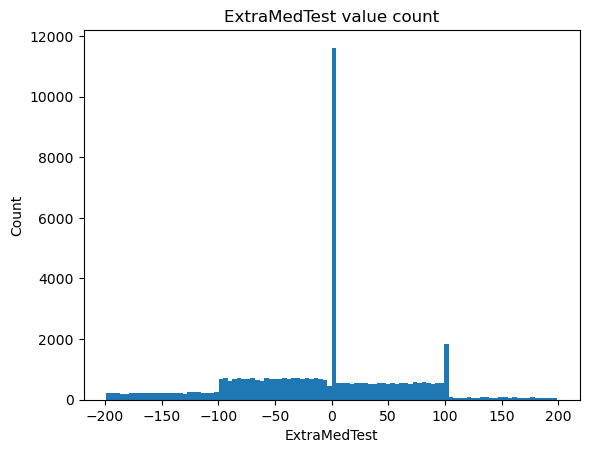

In [6]:
#ExtraMedTest value count
data_test['ExtraMedTest'].plot(kind='hist', bins=100, xlabel='ExtraMedTest', ylabel='Count', title='ExtraMedTest value count')

<Axes: xlabel='ExtraAlcoholTest', ylabel='Frequency'>

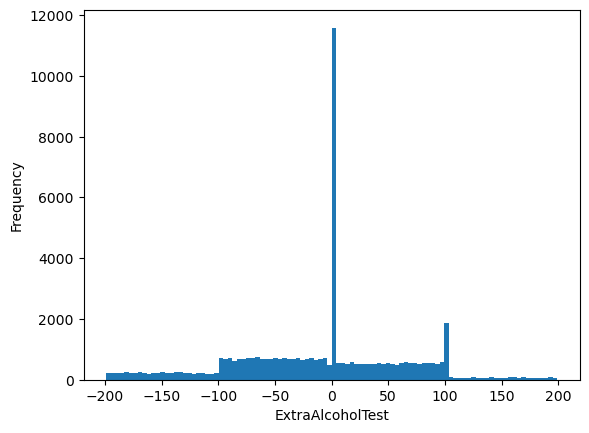

In [7]:
#ExtraAlcoholTest data distribution
data_test['ExtraAlcoholTest'].plot(kind='hist', bins=100, xlabel='ExtraAlcoholTest', ylabel='Frequency')

Despite a large distribution of both features in the given range of (-100, 100), the data still observe large falsely input data, espcially data in range (-200, -100). Hence, we need to reduce the data to our desired range

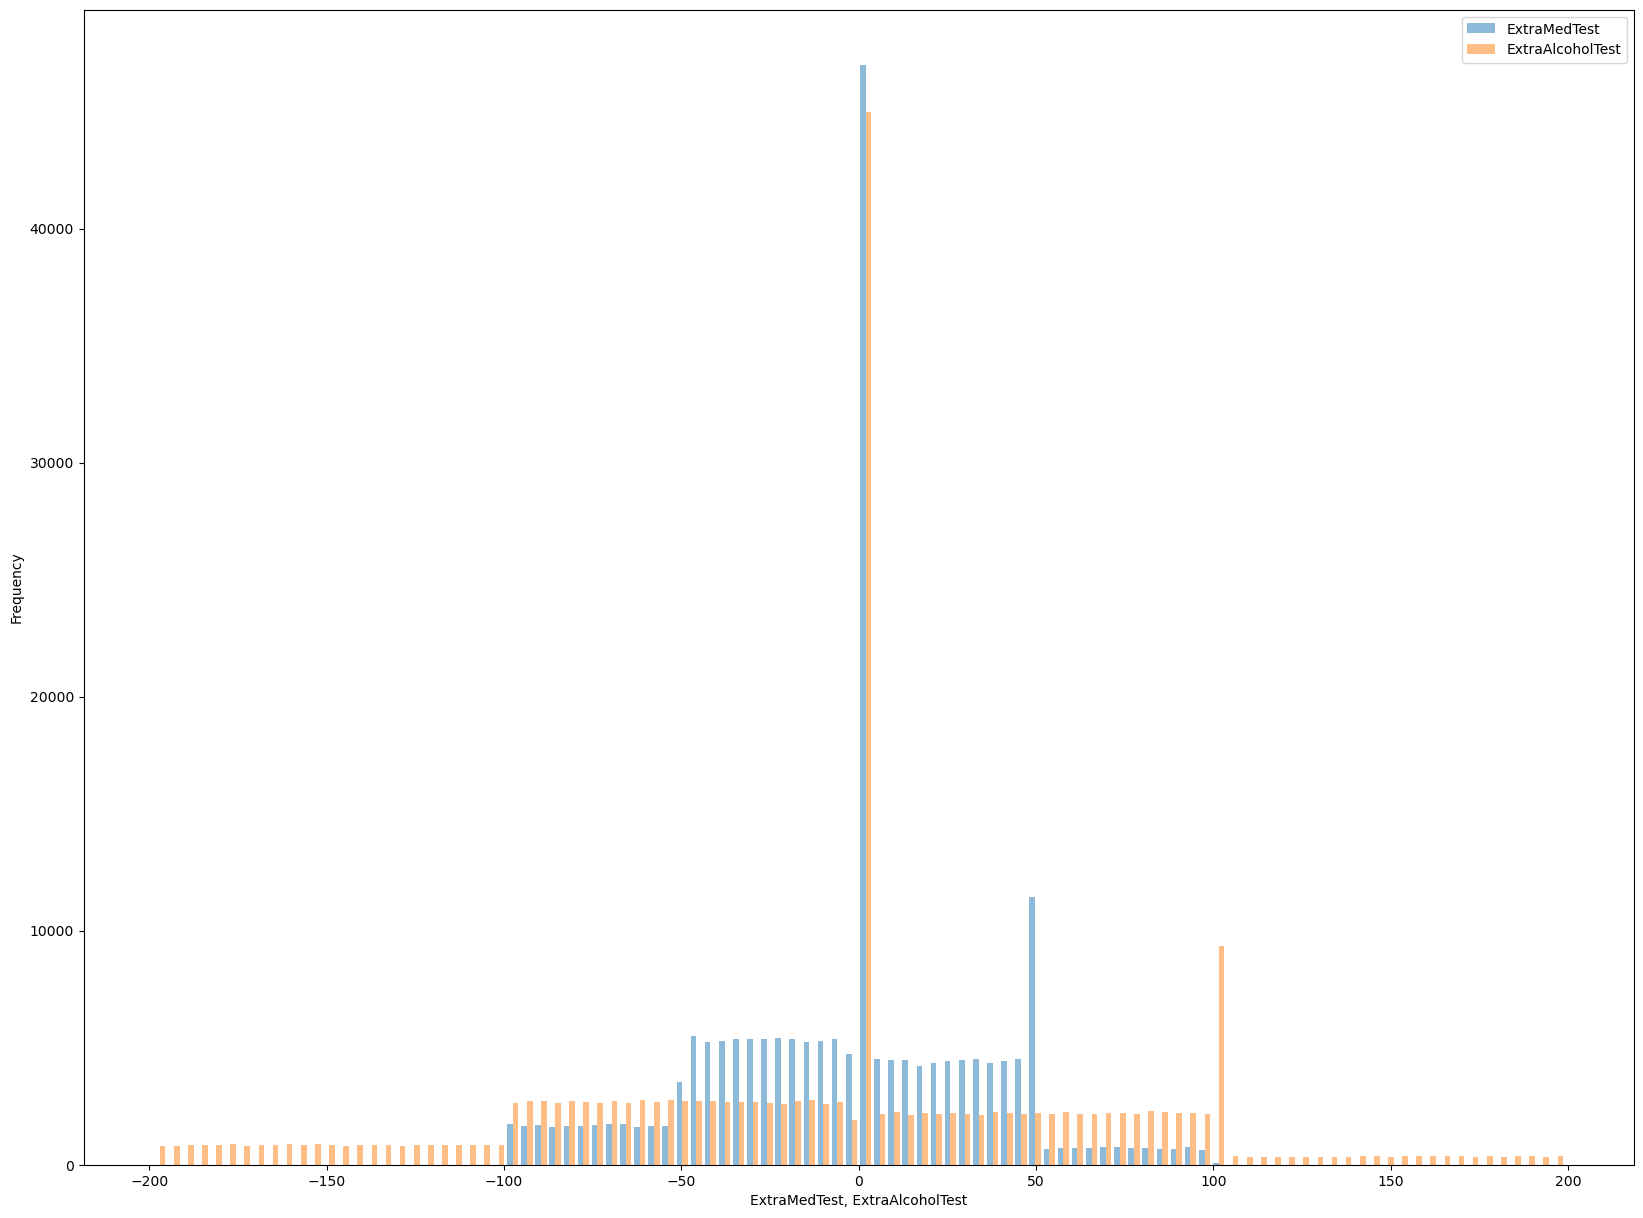

In [8]:
data_model['ExtraMedTest'] = data_model['ExtraMedTest']/2
data_test['ExtraMedTest'] = data_test['ExtraMedTest']/2
plt.figure(figsize=(20, 15))
plt.hist(data_model[['ExtraMedTest', 'ExtraAlcoholTest']], bins=100, alpha=0.5, label=['ExtraMedTest', 'ExtraAlcoholTest'])
plt.xlabel('ExtraMedTest, ExtraAlcoholTest')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

###### BMI abnormality

First, we will plot to see the distribution of BMI in the dataset

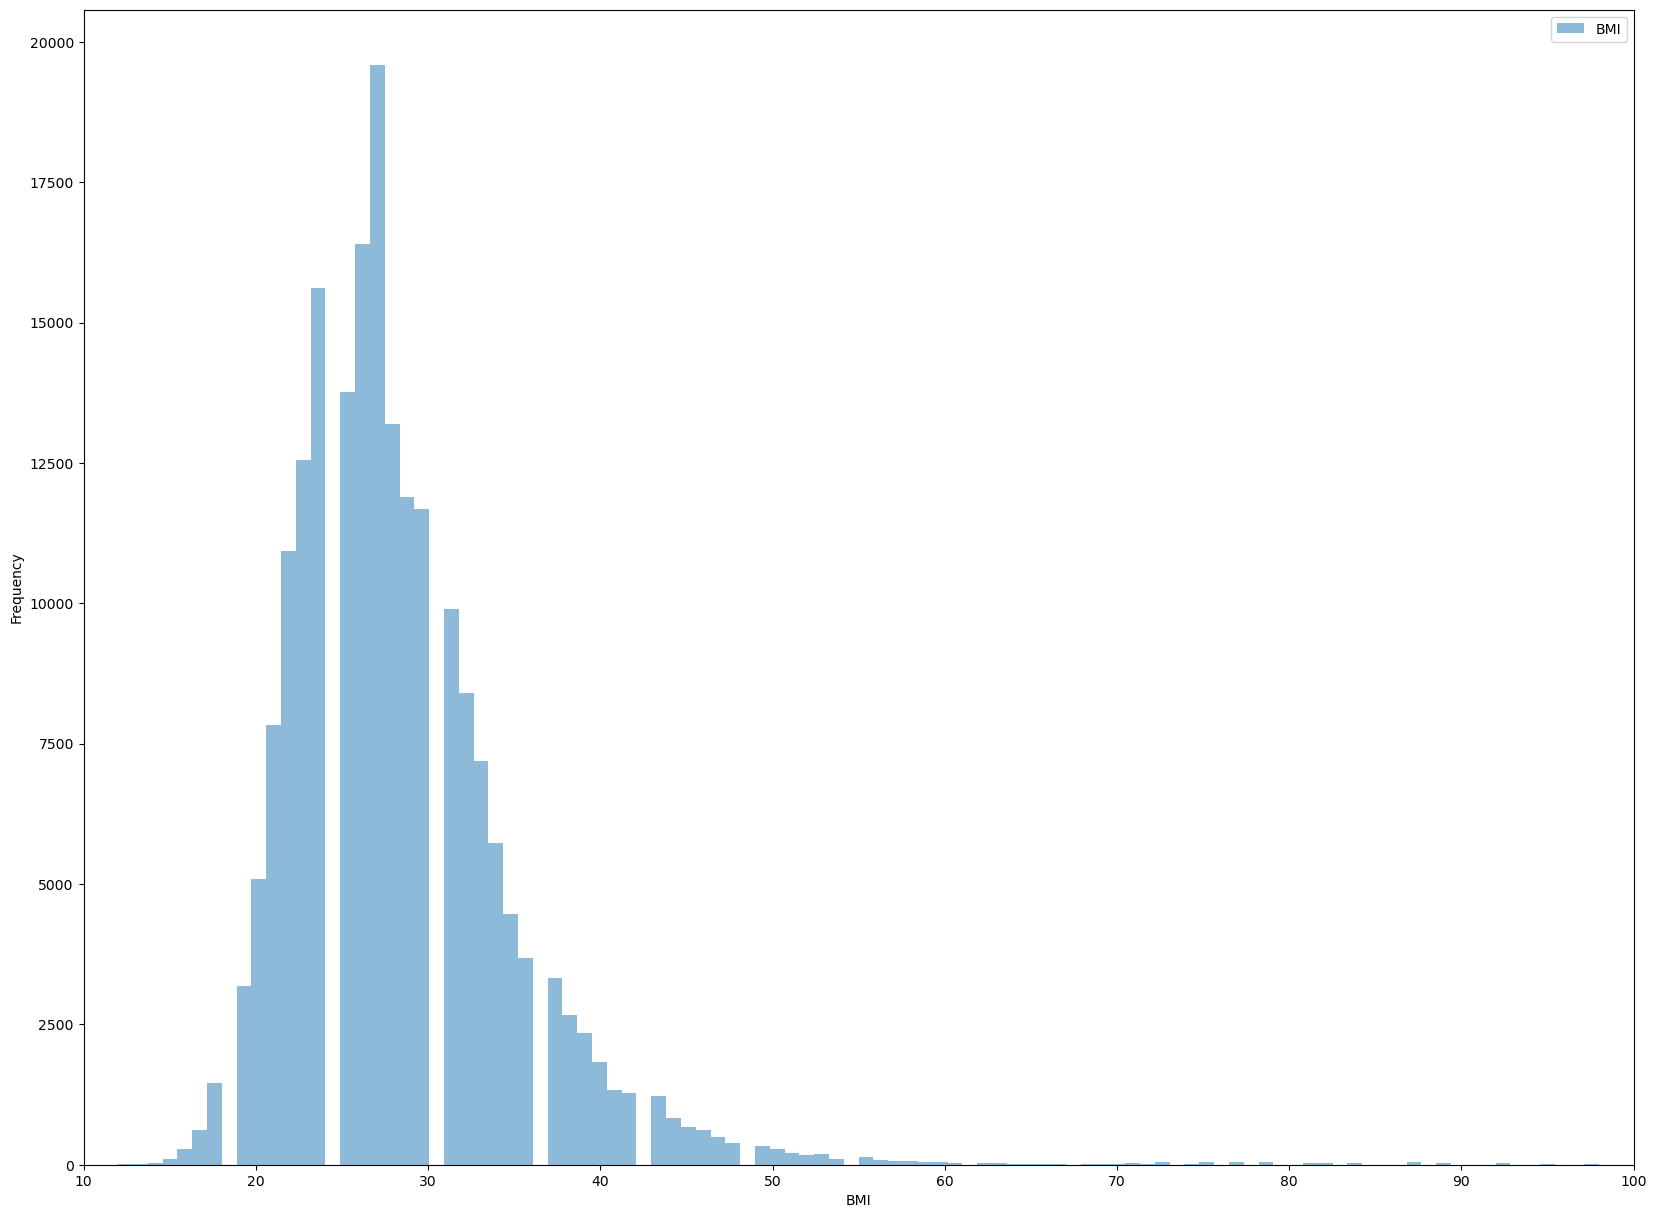

In [9]:
plt.figure(figsize=(20, 15))
plt.hist(data_model['BMI'], bins=100, alpha=0.5, label='BMI')
plt.xlim(left = 10, right = 100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

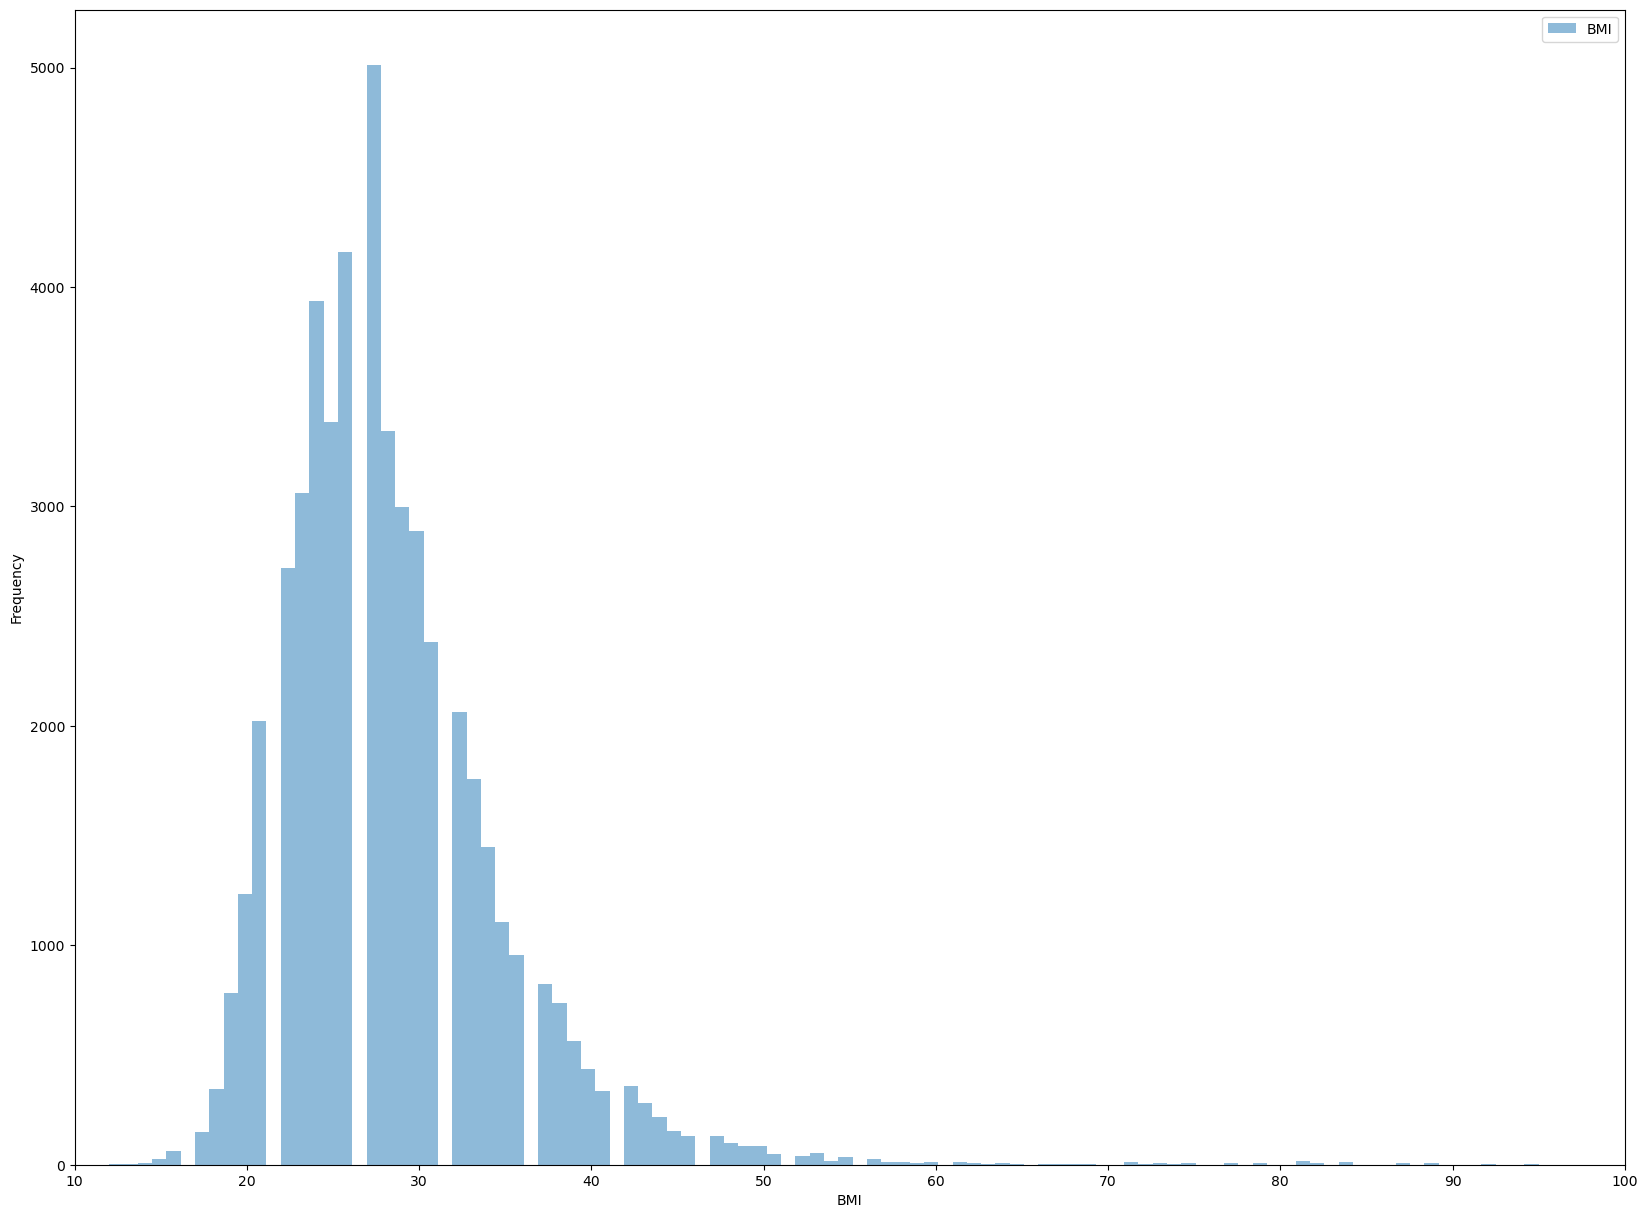

In [10]:
plt.figure(figsize=(20, 15))
plt.hist(data_test['BMI'], bins=100, alpha=0.5, label='BMI')
plt.xlim(left = 10, right = 100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

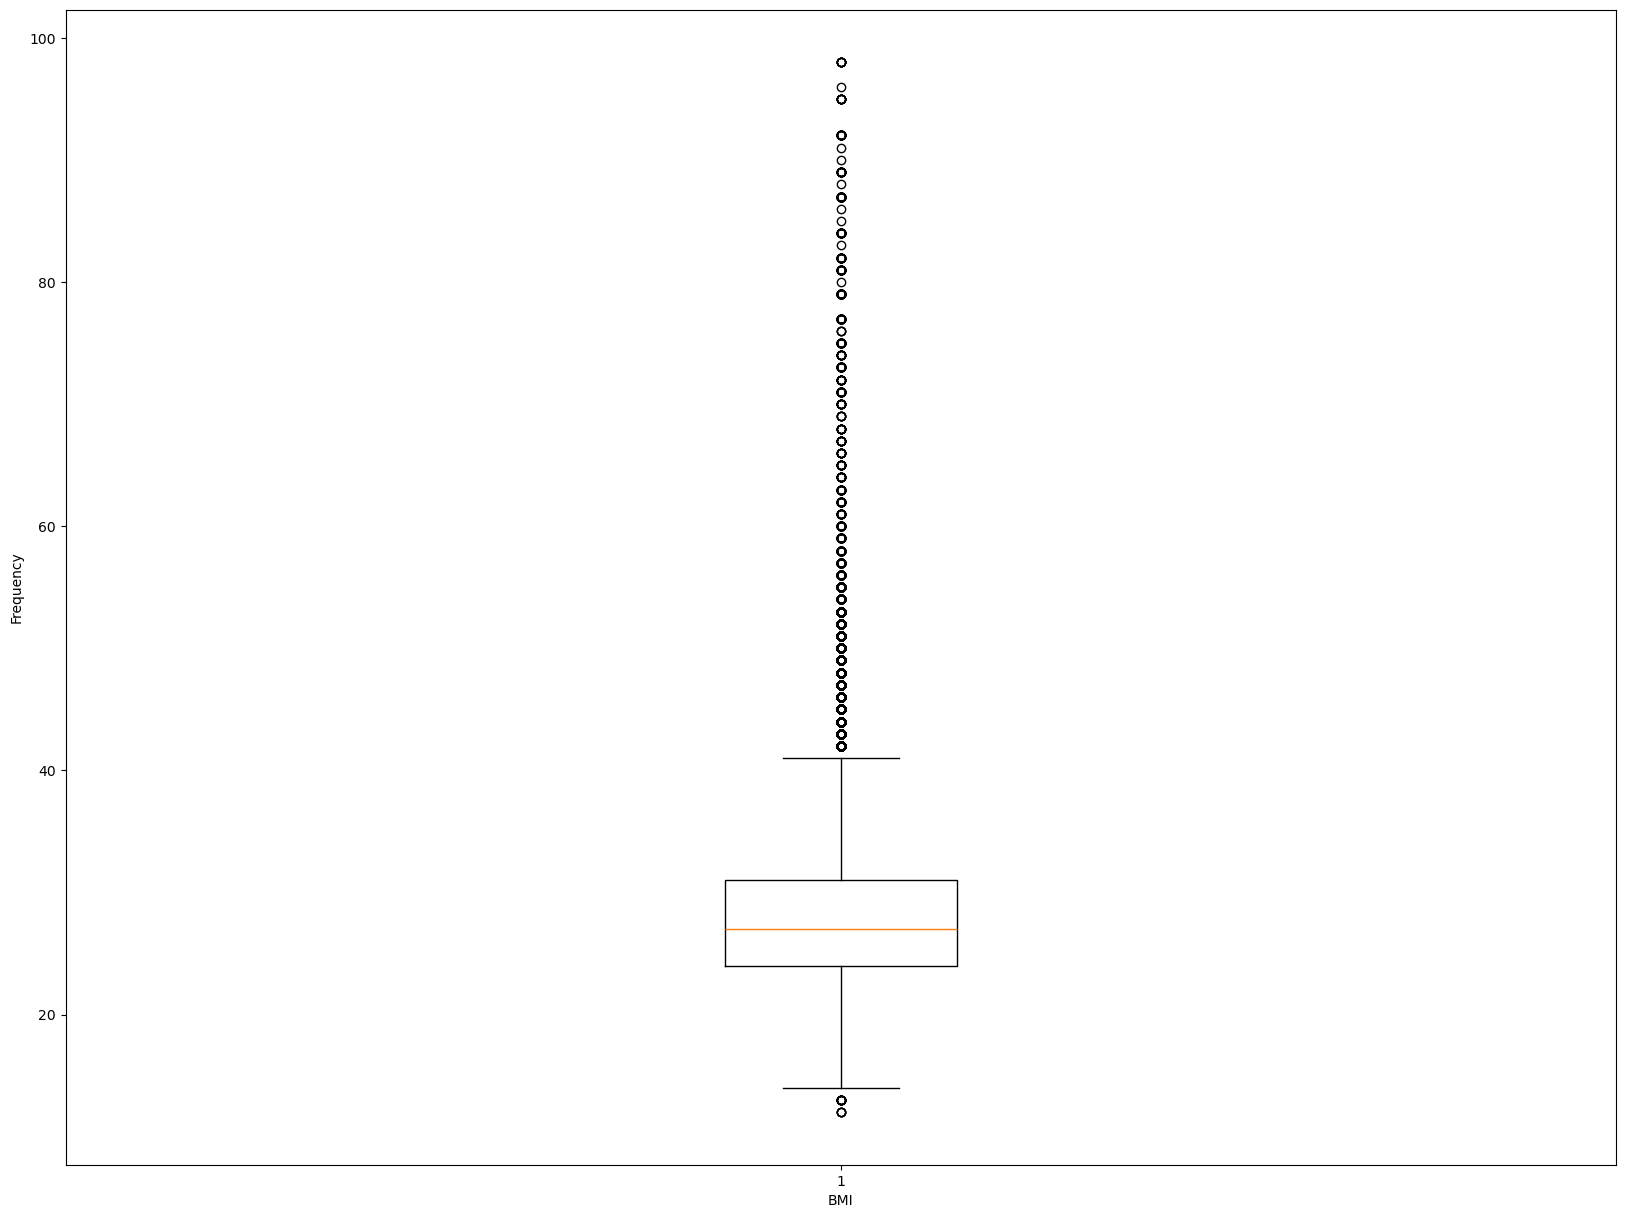

In [11]:
plt.figure(figsize=(20, 15))
plt.boxplot(data_model['BMI'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


#### 1.5. Checking for missing / null value

In [12]:
data_model.nunique()

HighBP                    2
HighChol                  2
CholCheck                 2
BMI                      83
Smoker                    2
Stroke                    2
HeartDiseaseorAttack      2
PhysActivity              2
Fruits                    2
Veggies                   2
HvyAlcoholConsump         2
AnyHealthcare             2
NoDocbcCost               2
GenHlth                   5
MentHlth                 31
PhysHlth                 31
DiffWalk                  2
Sex                       2
Age                      13
Education                 6
Income                    8
ExtraMedTest            399
ExtraAlcoholTest        399
Status                    2
dtype: int64

By investigating into unique value, with reference to the code book, we can determine that BMI, MenHlth, PhysHlth, ExtraMedTest and ExtraAlcoholTest are numerical features, and the remaining are categorical ones.

In [13]:
data_model.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

The result show no null value from this dataset

In [14]:
print(data_model.duplicated().sum())
data_model_duplicated = data_model[data_model.duplicated()]
data_model_duplicated.head()

208


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
20272,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,9,6,8,0.0,0,0
22582,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,0,0,1,5,6,8,0.0,0,0
23322,0,0,1,22,0,0,0,1,1,1,0,1,0,2,0,0,0,0,3,6,8,0.0,0,0
23790,0,1,1,24,0,0,0,1,1,1,0,1,0,2,0,0,0,1,9,6,8,0.0,0,0
25615,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,6,6,8,0.0,0,0


There are 208 duplicated rows from the train dataset. In this case, we will drop all duplicated rows

In [15]:
data_model.drop_duplicates(inplace=True)
print(data_model.shape)
print(data_model.duplicated().sum())

(202736, 24)
0


Finally, we will observe the distribution of the whole training and testing dataset

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

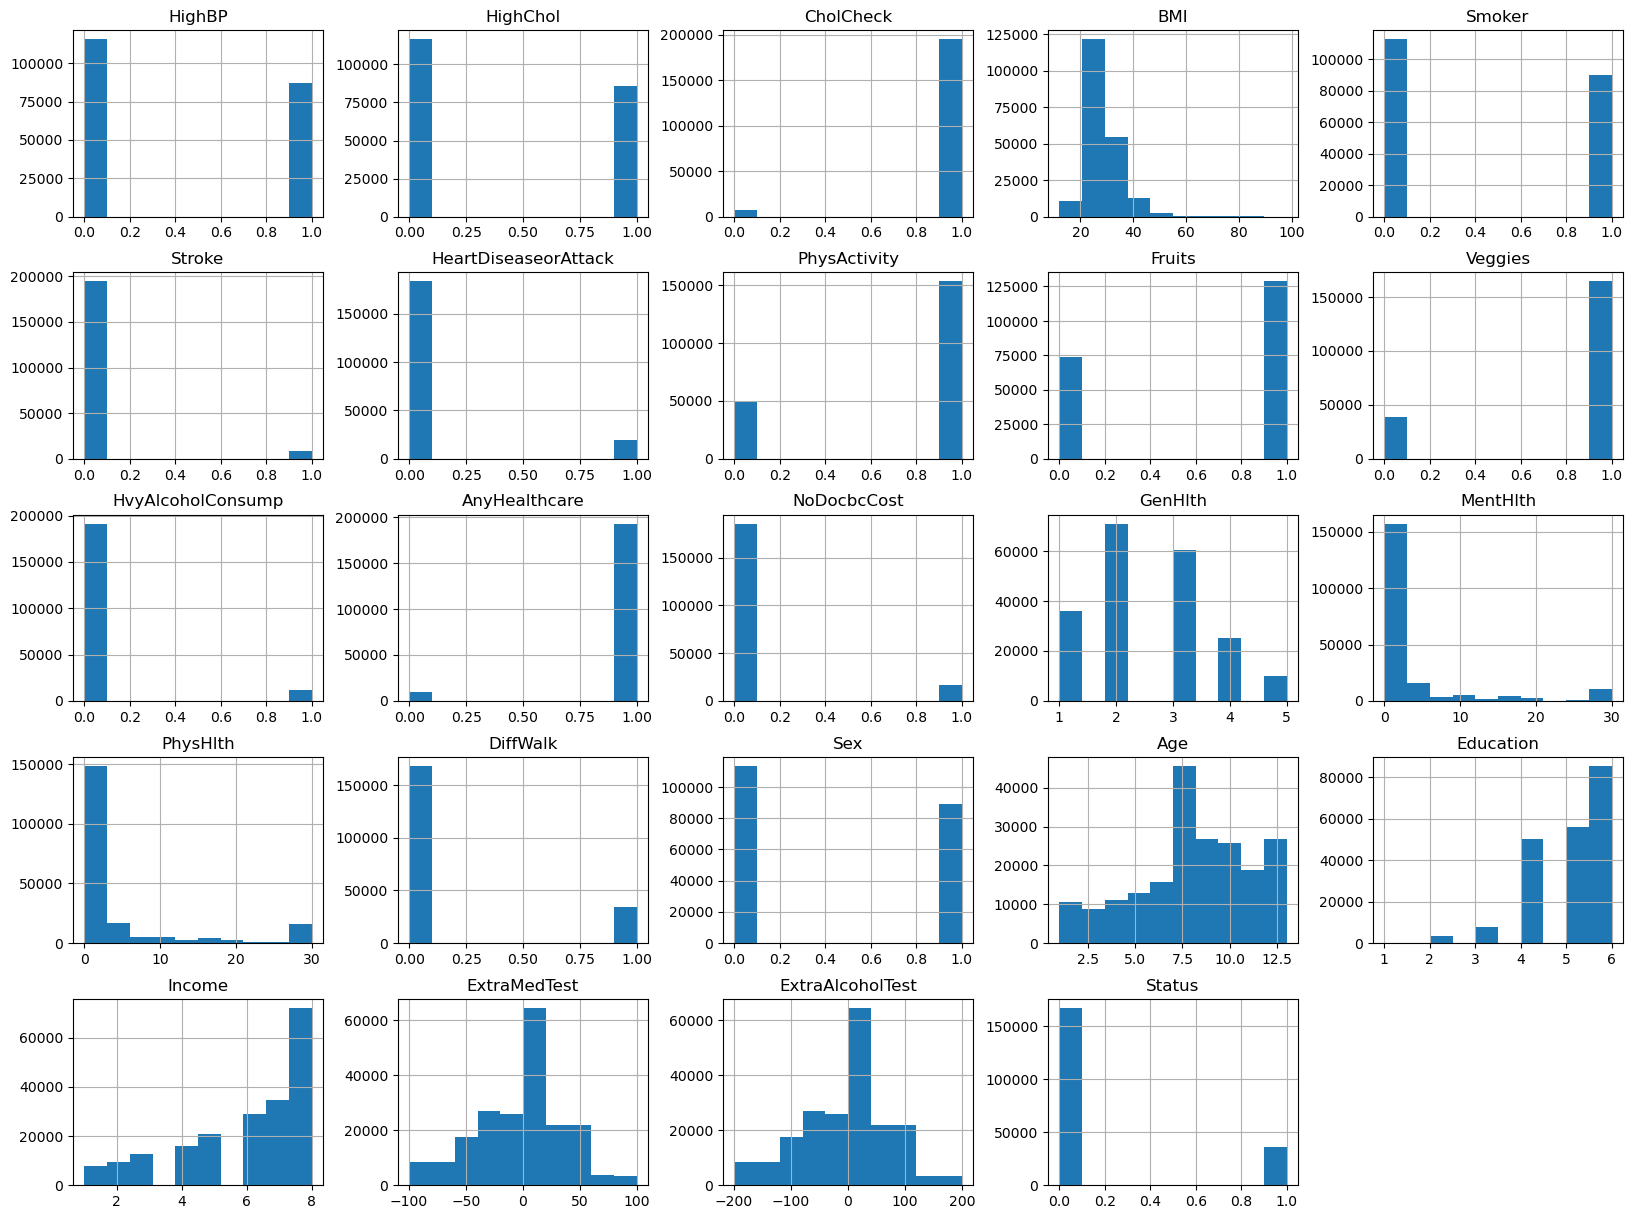

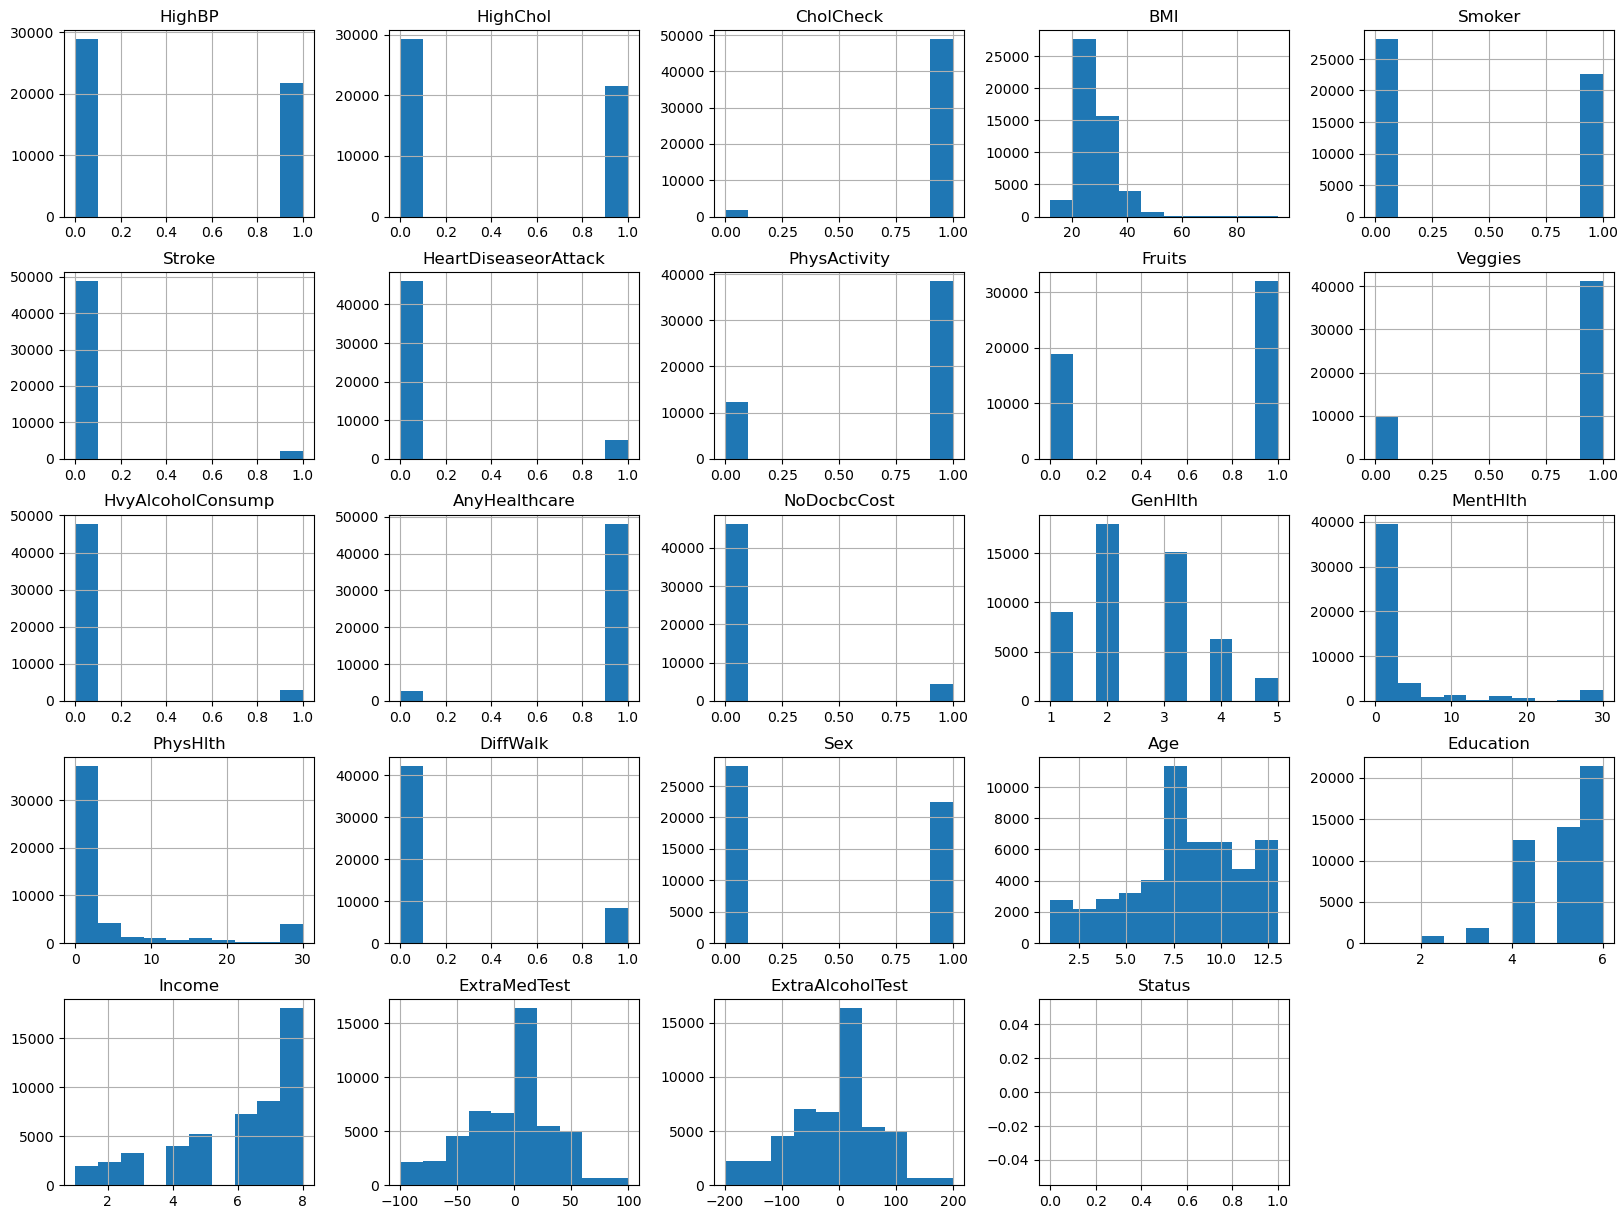

In [16]:
data_model.hist(figsize=(20, 15))
data_test.hist(figsize=(20, 15))

## 2. Univariate data analysis

### 2.1. Getting data distribution

#### 2.1.1. HighBP analysis

Categorical data:
- 0: no high blood pressure (low)
- 1: high blood pressure (high)

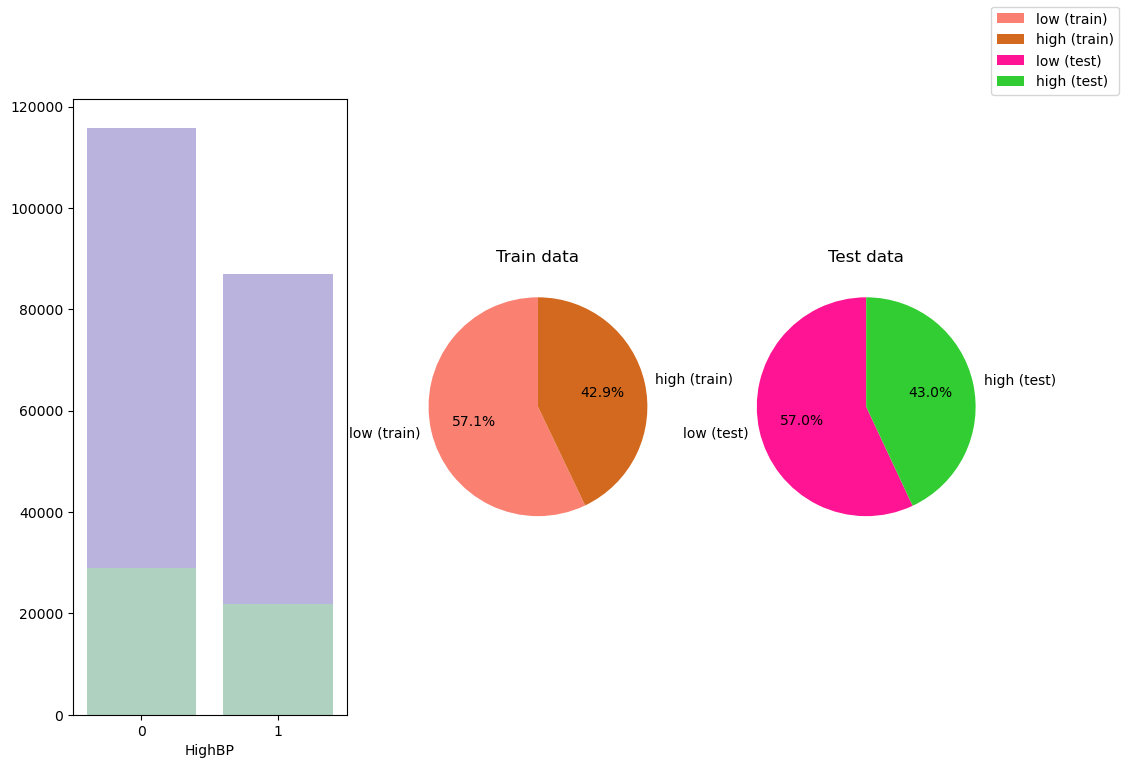

----HighBP----
Train data
        Counts  Percentage
HighBP                    
0       115750     0.57094
1        86986     0.42906

Test data
        Counts  Percentage
HighBP                    
0        28909    0.569793
1        21827    0.430207

          data_model     data_test
count  202736.000000  50736.000000
mean        0.429060      0.430207
std         0.494943      0.495110
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [17]:
uni_cat_plot(data_model, data_test, 'HighBP', ['low', 'high'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='HighBP')



#### 2.1.2. HighChol analysis

Categorical Data:
- 0: no high cholesterol (low)
- 1: high cholesterol (high)

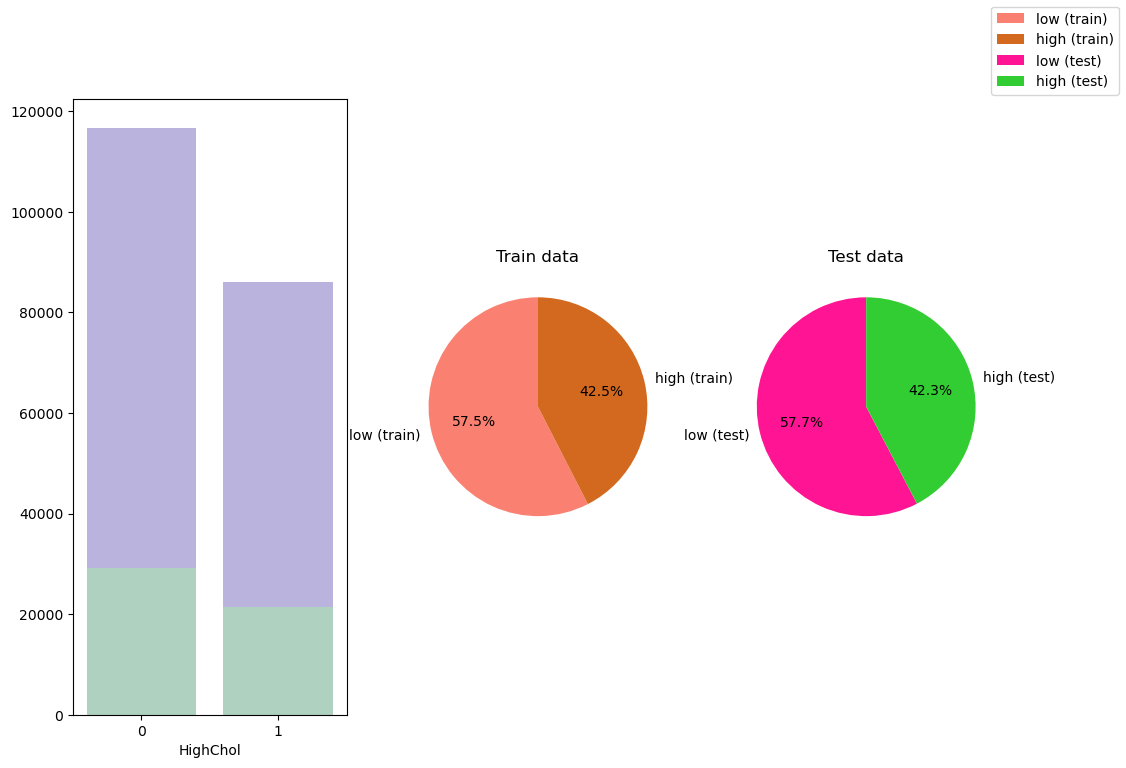

----HighChol----
Train data
          Counts  Percentage
HighChol                    
0         116648    0.575369
1          86088    0.424631

Test data
          Counts  Percentage
HighChol                    
0          29263     0.57677
1          21473     0.42323

          data_model     data_test
count  202736.000000  50736.000000
mean        0.424631      0.423230
std         0.494288      0.494076
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [18]:
uni_cat_plot(data_model, data_test, 'HighChol', ['low', 'high'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='HighChol')

#### 2.1.3. CholCheck Analysis

Catgorical data:
- 0: don't have cholesterol check
- 1: have cholesterol check

Duration: 5 years

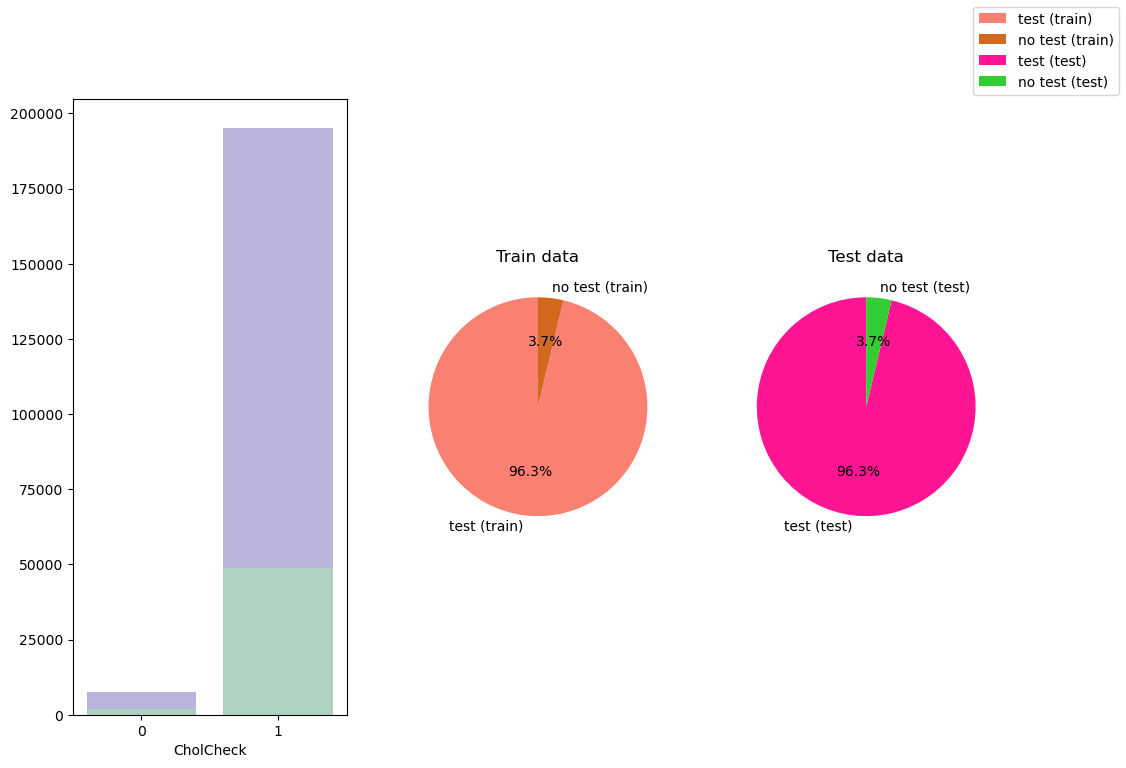

----CholCheck----
Train data
           Counts  Percentage
CholCheck                    
1          195158    0.962621
0            7578    0.037379

Test data
           Counts  Percentage
CholCheck                    
1           48845    0.962729
0            1891    0.037271

          data_model     data_test
count  202736.000000  50736.000000
mean        0.962621      0.962729
std         0.189688      0.189428
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [19]:
uni_cat_plot(data_model, data_test, 'CholCheck', ['test', 'no test'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='CholCheck')

#### 2.1.4. Smoker analysis

Categorical data:
- 0: not a smoker / have yet to smoke enough
- 1: smoker

Quantity: 100 cigarrets (5 pack)
Duration: lifetime

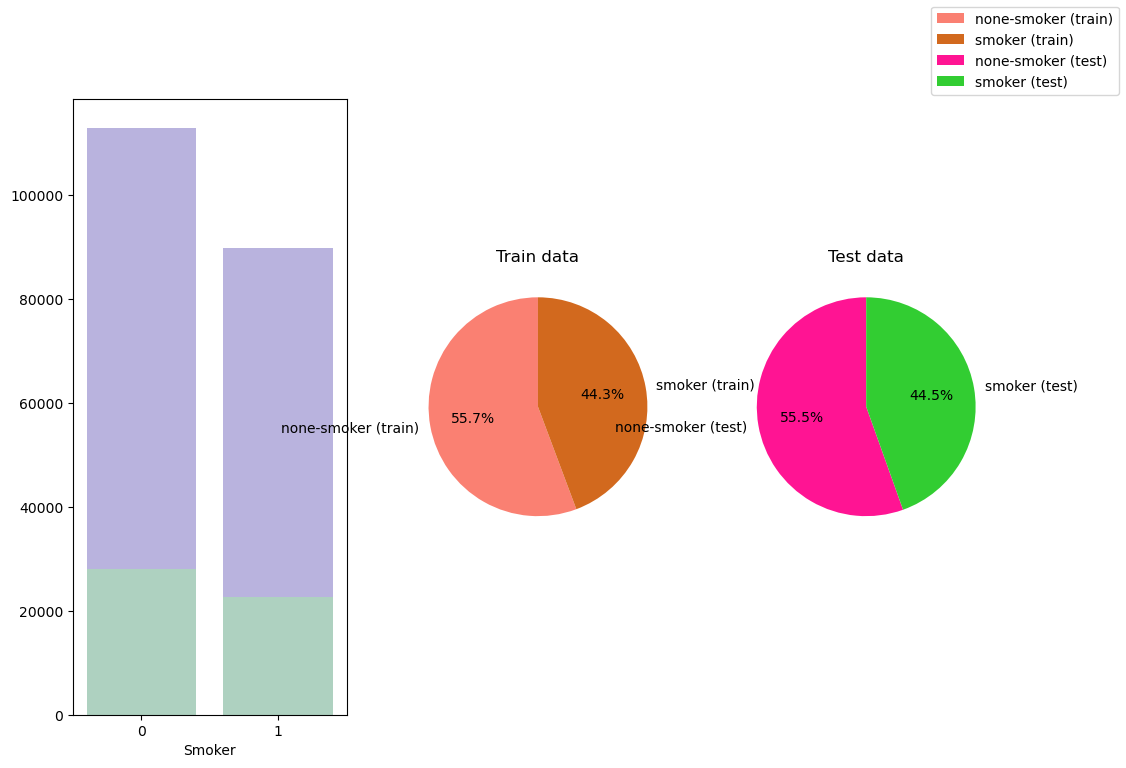

----Smoker----
Train data
        Counts  Percentage
Smoker                    
0       112930     0.55703
1        89806     0.44297

Test data
        Counts  Percentage
Smoker                    
0        28143    0.554695
1        22593    0.445305

          data_model     data_test
count  202736.000000  50736.000000
mean        0.442970      0.445305
std         0.496738      0.497004
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [20]:
uni_cat_plot(data_model, data_test, 'Smoker', ['none-smoker', 'smoker'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Smoker')


#### 2.1.5. Stroke analysis

Categorical data:
- 0: not aware(*) of stroke
- 1: aware of stroke

(*): aware of stroke means that the patient has been told or have experienced stroke

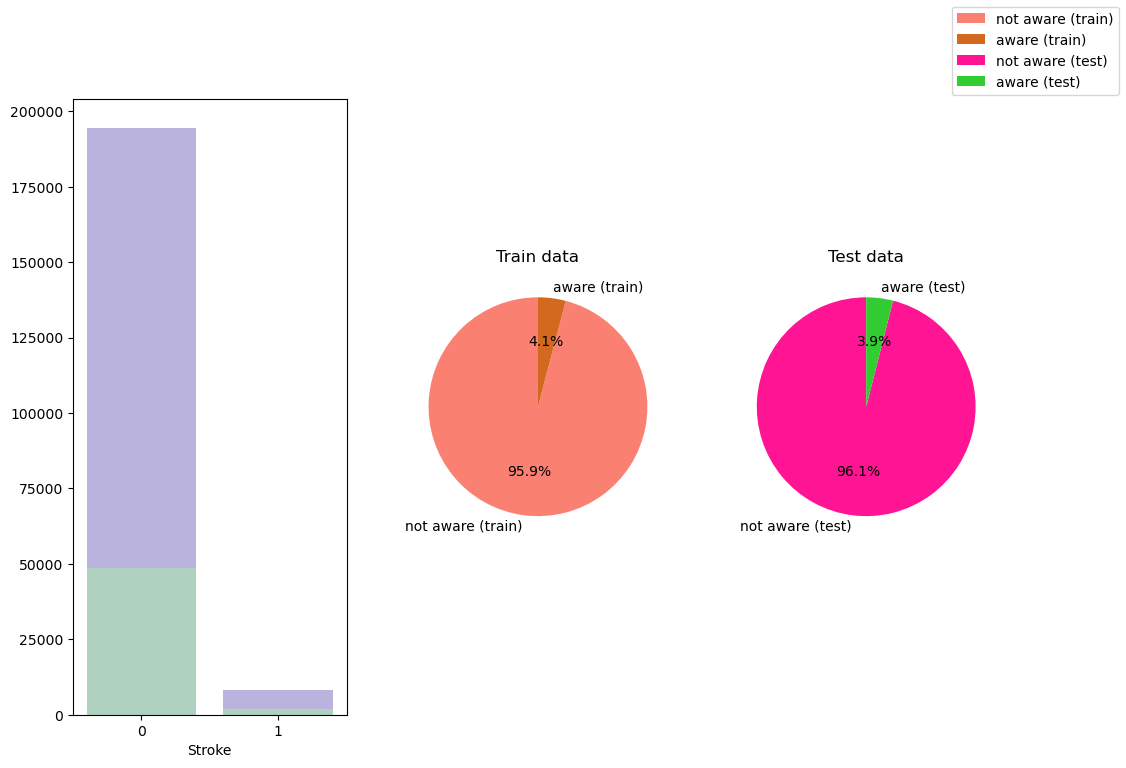

----Stroke----
Train data
        Counts  Percentage
Stroke                    
0       194447    0.959114
1         8289    0.040886

Test data
        Counts  Percentage
Stroke                    
0        48733    0.960521
1         2003    0.039479

          data_model     data_test
count  202736.000000  50736.000000
mean        0.040886      0.039479
std         0.198026      0.194733
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [21]:
uni_cat_plot(data_model, data_test, 'Stroke', ['not aware', 'aware'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Stroke')

#### 2.1.6. Heart disease or attack analysis

Categorical data:
- 0: don't have CHD(*) or MI(**)
- 1: have CHD or MI

(*): coronary heart disease
(**): myocardial infraction


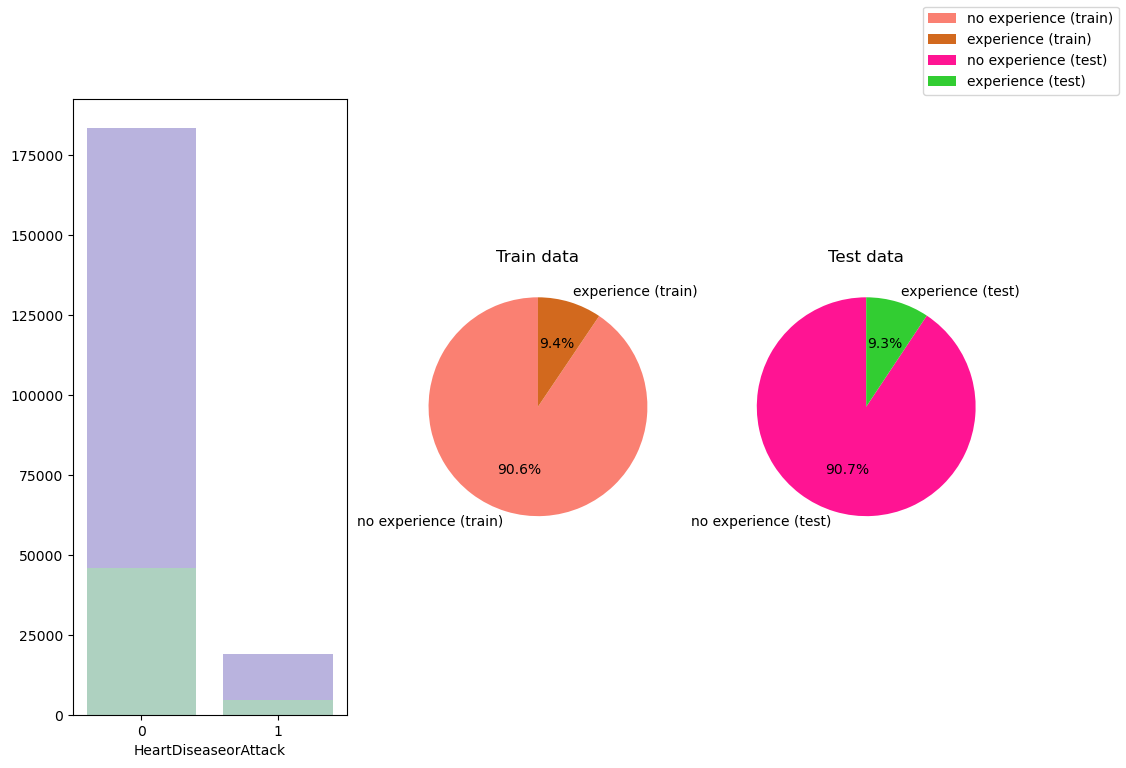

----HeartDiseaseorAttack----
Train data
                      Counts  Percentage
HeartDiseaseorAttack                    
0                     183580    0.905513
1                      19156    0.094487

Test data
                      Counts  Percentage
HeartDiseaseorAttack                    
0                      45999    0.906634
1                       4737    0.093366

          data_model     data_test
count  202736.000000  50736.000000
mean        0.094487      0.093366
std         0.292506      0.290947
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [22]:
uni_cat_plot(data_model, data_test, 'HeartDiseaseorAttack', ['no experience', 'experience'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='HeartDiseaseorAttack')

#### 2.1.7. Fruits analysis

Categorical data:
- 0: fruit none-consumer
- 1: fruit consumer

Criterion: Consuming fruit at least once a day

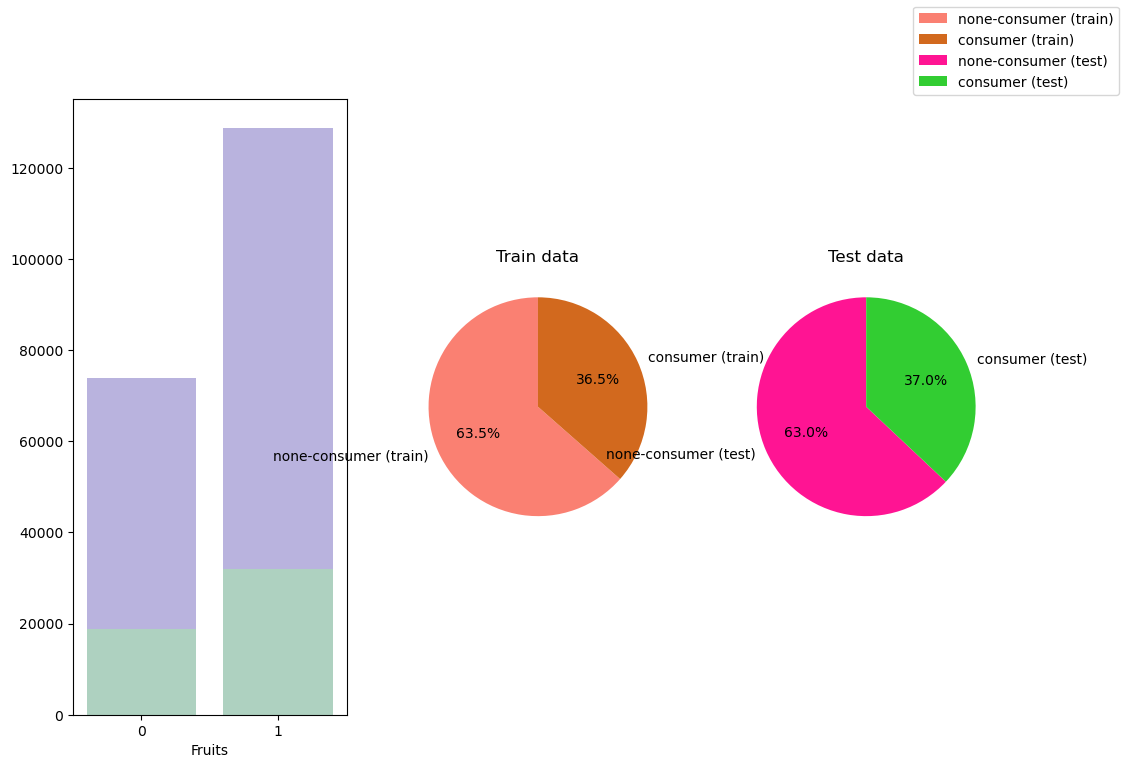

----Fruits----
Train data
        Counts  Percentage
Fruits                    
1       128753    0.635077
0        73983    0.364923

Test data
        Counts  Percentage
Fruits                    
1        31953    0.629789
0        18783    0.370211

          data_model     data_test
count  202736.000000  50736.000000
mean        0.635077      0.629789
std         0.481410      0.482866
min         0.000000      0.000000
25%         0.000000      0.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [23]:
uni_cat_plot(data_model, data_test, 'Fruits', ['none-consumer', 'consumer'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Fruits')

#### 2.1.8. Veggies analysis

Catgorical data:
- 0: vegetable none-consumer
- 1: vegetable consumer

Criterion: consuming vegetable(s) at least once a day

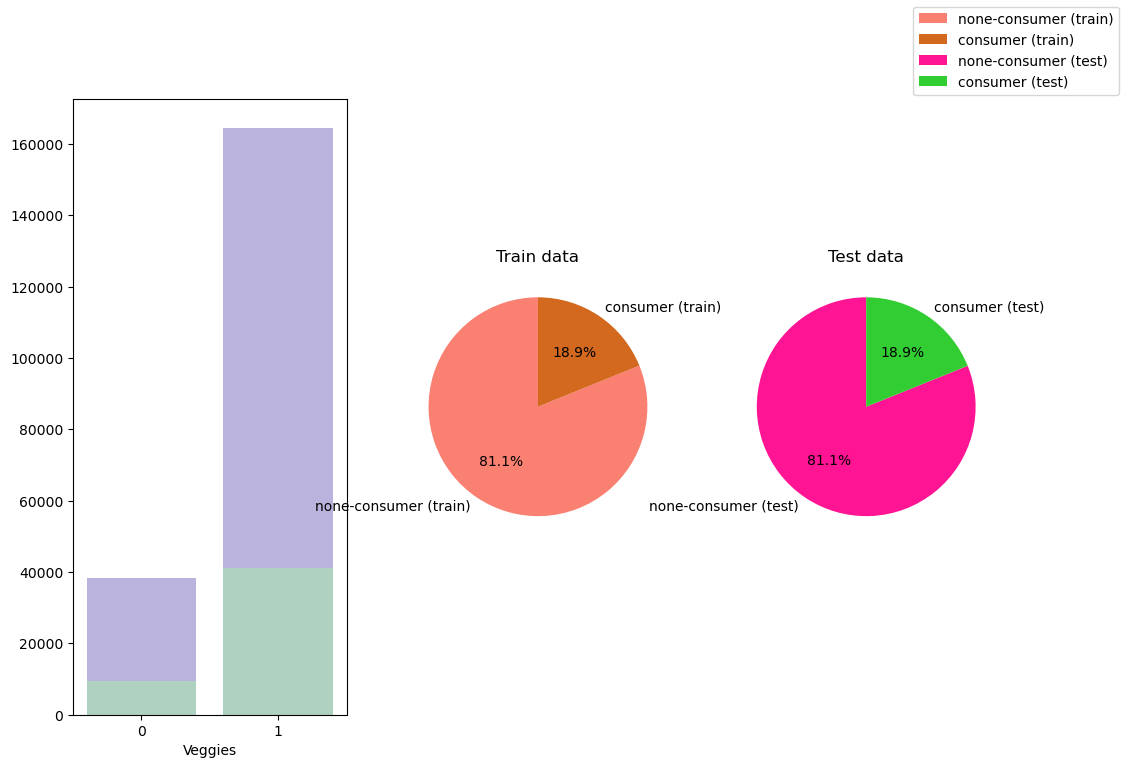

----Veggies----
Train data
         Counts  Percentage
Veggies                    
1        164488    0.811341
0         38248    0.188659

Test data
         Counts  Percentage
Veggies                    
1         41148    0.811022
0          9588    0.188978

          data_model     data_test
count  202736.000000  50736.000000
mean        0.811341      0.811022
std         0.391239      0.391495
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [24]:
uni_cat_plot(data_model, data_test, 'Veggies', ['none-consumer', 'consumer'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Veggies')

#### 2.1.9. Heavy Alcohol Consumption analysis

Categorical data:
- 0: heavy alcohol none-consumer
- 1: heavy alcohol consumer

Criteria:
- Men: over 14 drinks/week
- Women: over 7 drinks/week

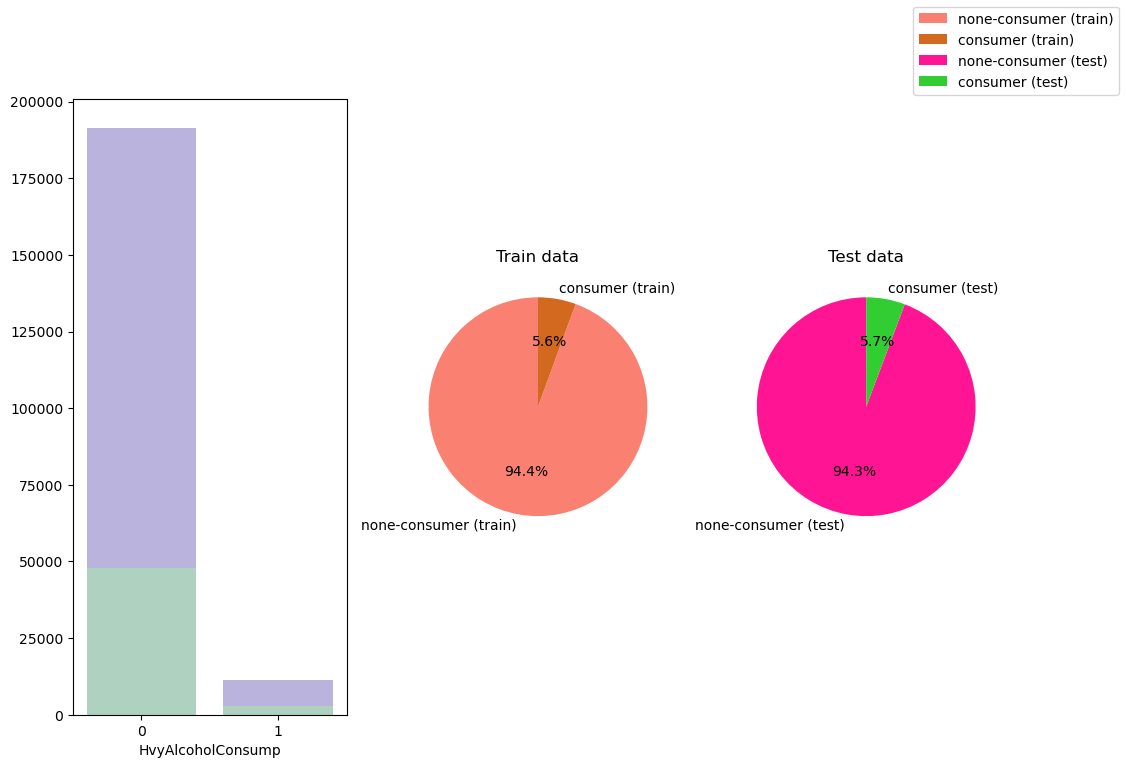

----HvyAlcoholConsump----
Train data
                   Counts  Percentage
HvyAlcoholConsump                    
0                  191389    0.944031
1                   11347    0.055969

Test data
                   Counts  Percentage
HvyAlcoholConsump                    
0                   47827    0.942664
1                    2909    0.057336

          data_model     data_test
count  202736.000000  50736.000000
mean        0.055969      0.057336
std         0.229863      0.232486
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [25]:
uni_cat_plot(data_model, data_test, 'HvyAlcoholConsump', ['none-consumer', 'consumer'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='HvyAlcoholConsump')

#### 2.1.10. AnyHealthCare analysis

Categorical data:
- 0: don't have healthcare coverage
- 1: have healthcare coverage

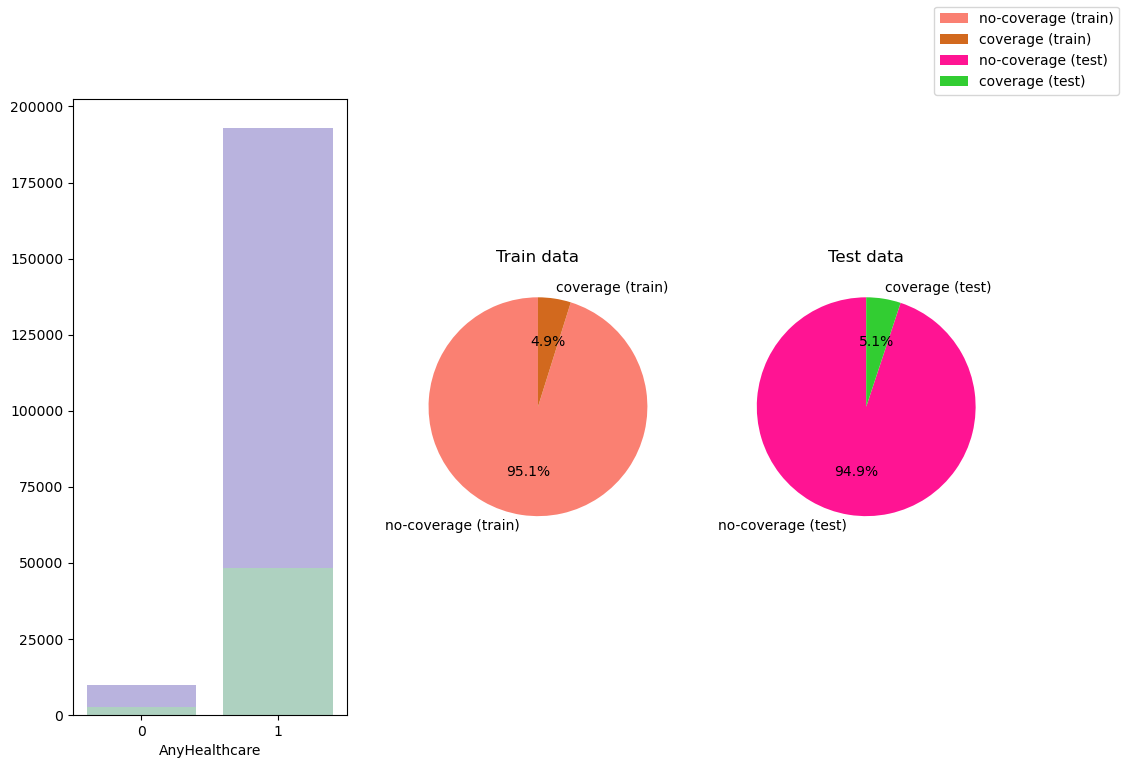

----AnyHealthcare----
Train data
               Counts  Percentage
AnyHealthcare                    
1              192902    0.951494
0                9834    0.048506

Test data
               Counts  Percentage
AnyHealthcare                    
1               48153    0.949089
0                2583    0.050911

          data_model     data_test
count  202736.000000  50736.000000
mean        0.951494      0.949089
std         0.214834      0.219817
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [26]:
uni_cat_plot(data_model, data_test, 'AnyHealthcare', ['no-coverage', 'coverage'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='AnyHealthcare')

#### 2.1.11. NoDocbcCost Analysis

Categorical data:
- 0: Don't visit doctor due to cost
- 1: Visit doctor

Duration: 12 months

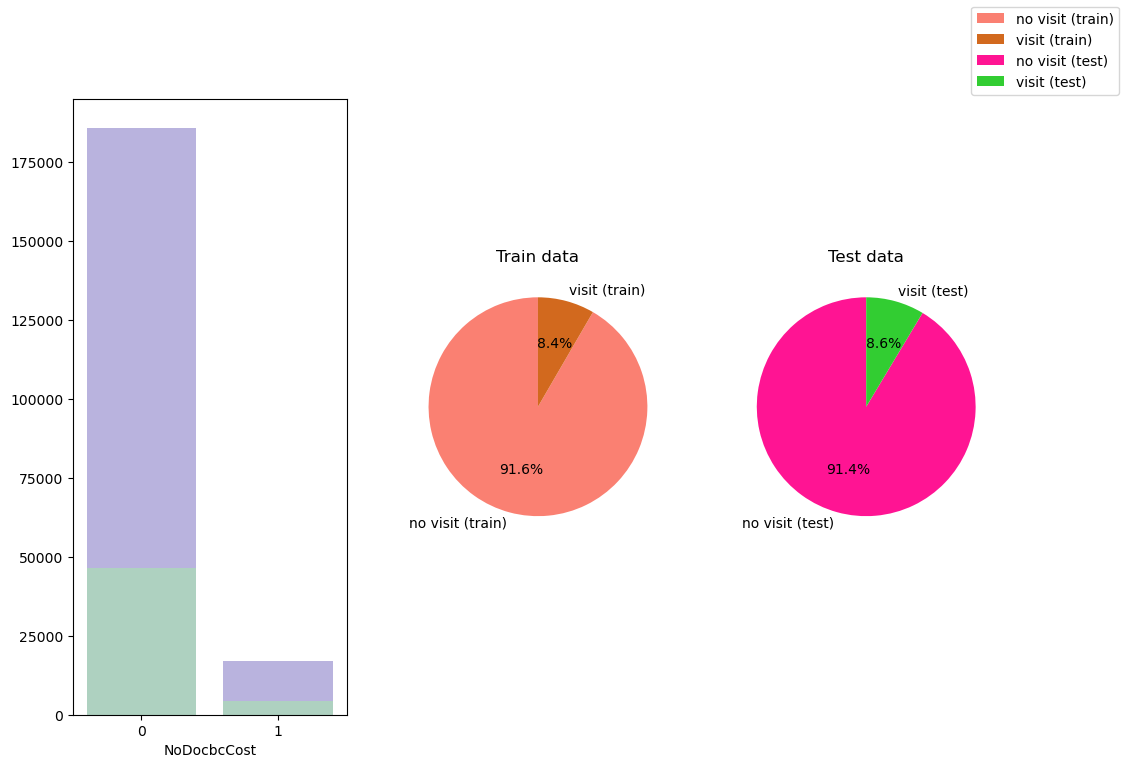

----NoDocbcCost----
Train data
             Counts  Percentage
NoDocbcCost                    
0            185751    0.916221
1             16985    0.083779

Test data
             Counts  Percentage
NoDocbcCost                    
0             46367    0.913888
1              4369    0.086112

          data_model     data_test
count  202736.000000  50736.000000
mean        0.083779      0.086112
std         0.277057      0.280533
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [27]:
uni_cat_plot(data_model, data_test, 'NoDocbcCost', ['no visit', 'visit'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='NoDocbcCost')

#### 2.1.12. GenHlth analysis

Categorical data:
- 1: excellent
- 2: very good
- 3: good
- 4: fair
- 5: poor

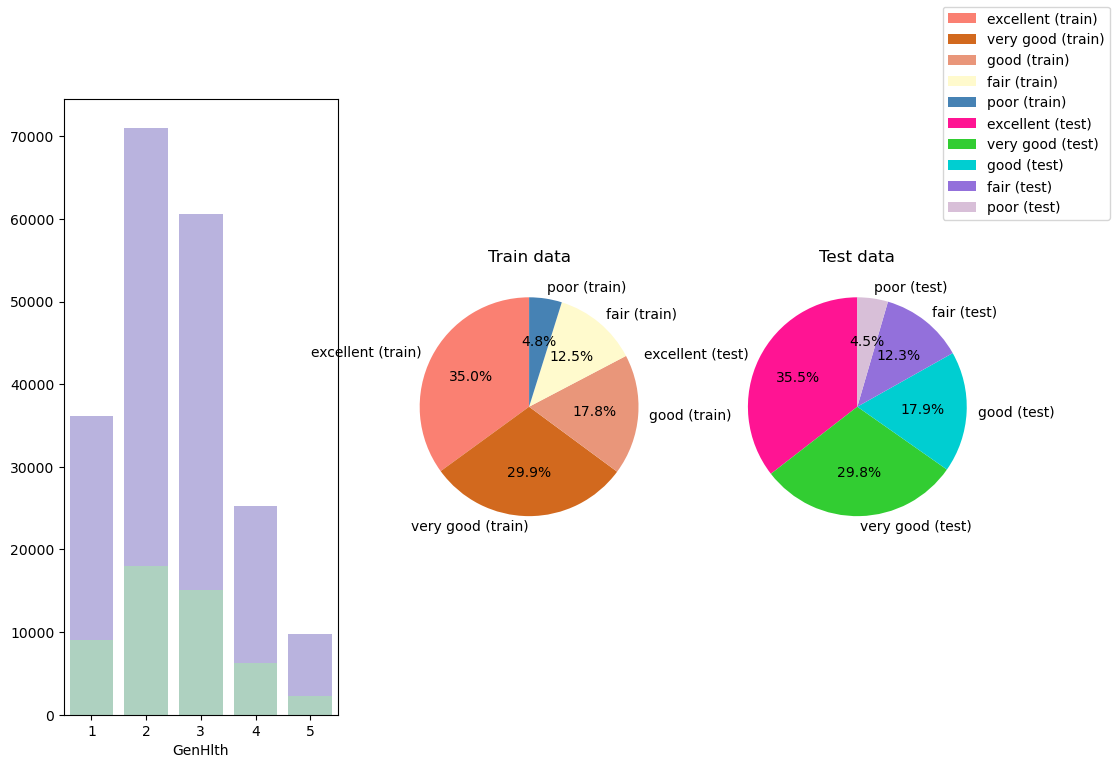

----GenHlth----
Train data
         Counts  Percentage
GenHlth                    
2         70993    0.350175
3         60543    0.298630
1         36097    0.178049
4         25313    0.124857
5          9790    0.048289

Test data
         Counts  Percentage
GenHlth                    
2         18013    0.355034
3         15100    0.297619
1          9075    0.178867
4          6257    0.123325
5          2291    0.045155

          data_model     data_test
count  202736.000000  50736.000000
mean        2.515163      2.500867
std         1.070198      1.060819
min         1.000000      1.000000
25%         2.000000      2.000000
50%         2.000000      2.000000
75%         3.000000      3.000000
max         5.000000      5.000000


In [28]:
uni_cat_plot(data_model, data_test, 'GenHlth', ['excellent', 'very good', 'good', 'fair', 'poor'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='GenHlth')

#### 2.1.13. DiffWalk analysis

Categorical data:
- 0: difficulty in walking
- 1: no difficulty in walking

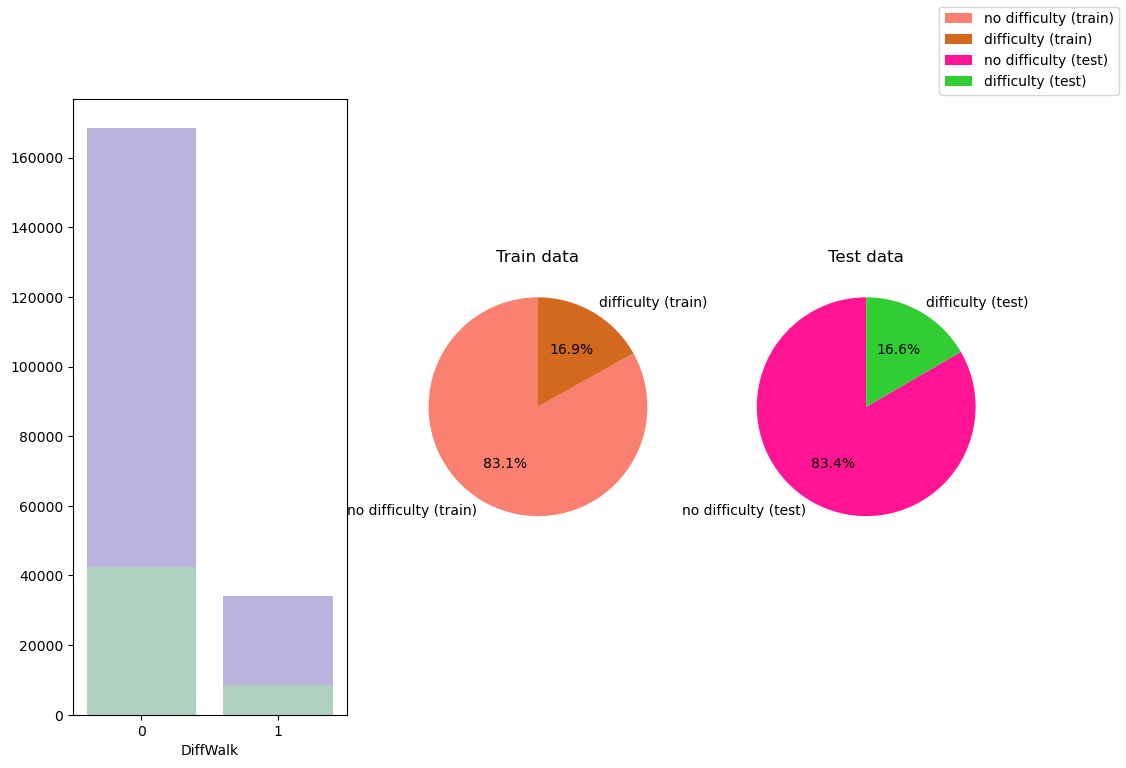

----DiffWalk----
Train data
          Counts  Percentage
DiffWalk                    
0         168498     0.83112
1          34238     0.16888

Test data
          Counts  Percentage
DiffWalk                    
0          42299    0.833708
1           8437    0.166292

          data_model     data_test
count  202736.000000  50736.000000
mean        0.168880      0.166292
std         0.374647      0.372346
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [29]:
uni_cat_plot(data_model, data_test, 'DiffWalk', ['no difficulty', 'difficulty'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='DiffWalk')

#### 2.1.14. Sex analysis

Categorical data:
- 0: female
- 1: male

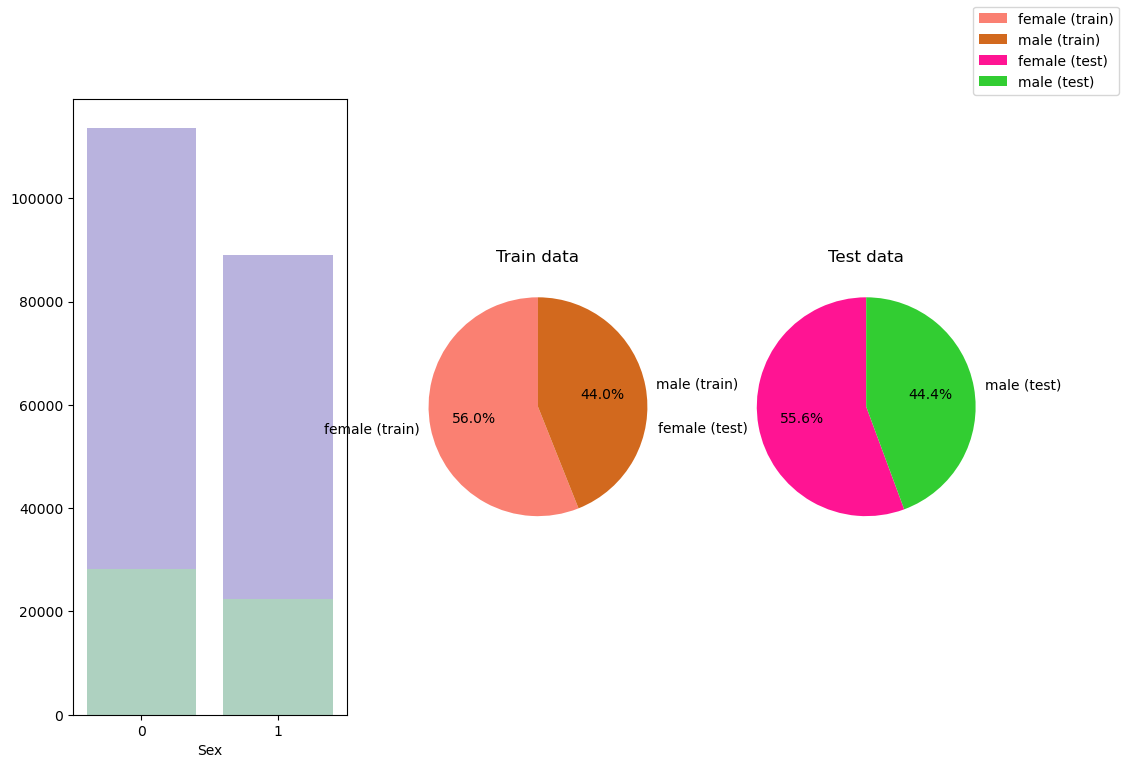

----Sex----
Train data
     Counts  Percentage
Sex                    
0    113618    0.560423
1     89118    0.439577

Test data
     Counts  Percentage
Sex                    
0     28233    0.556469
1     22503    0.443531

          data_model     data_test
count  202736.000000  50736.000000
mean        0.439577      0.443531
std         0.496337      0.496806
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [30]:
uni_cat_plot(data_model, data_test, 'Sex', ['female', 'male'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Sex')

#### 2.1.15. Age analysis

Categorical data:
- 1: 18-24
- 9: 60-64
- 13: 80>

Different range for age group

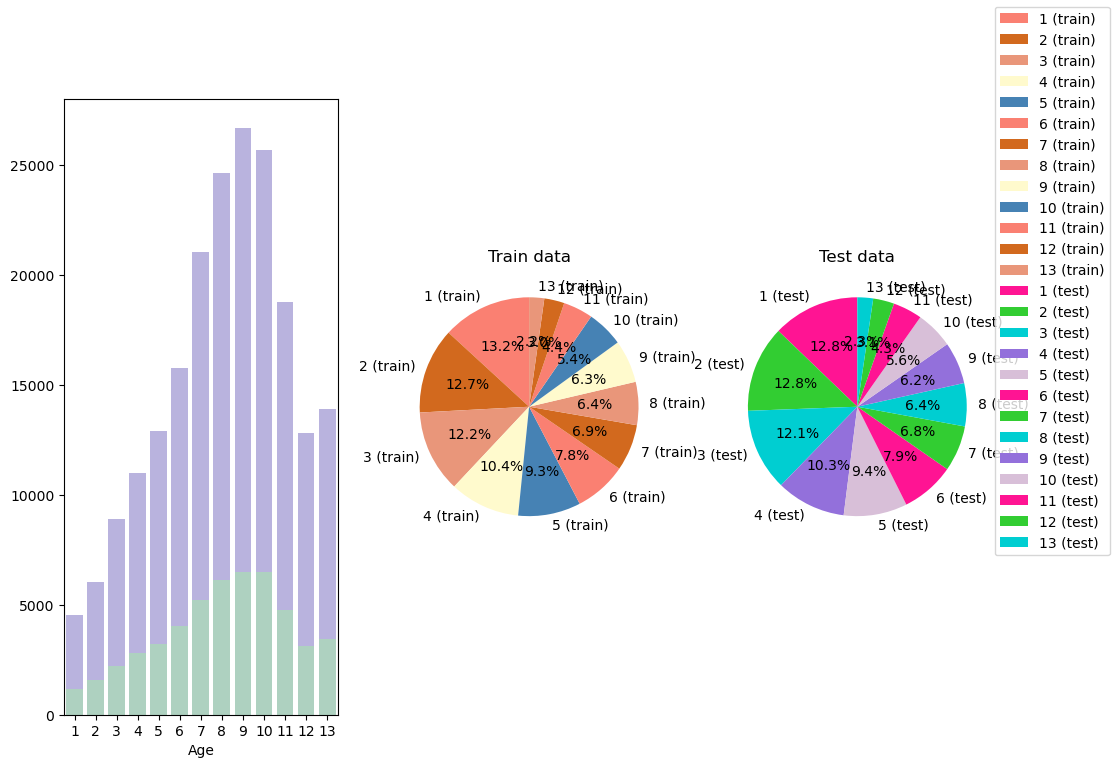

----Age----
Train data
     Counts  Percentage
Age                    
9     26704    0.131718
10    25695    0.126741
8     24650    0.121587
7     21066    0.103909
11    18764    0.092554
6     15762    0.077746
13    13925    0.068685
5     12905    0.063654
12    12834    0.063304
4     10980    0.054159
3      8912    0.043959
2      6019    0.029689
1      4520    0.022295

Test data
     Counts  Percentage
Age                    
9      6507    0.128252
10     6481    0.127740
8      6154    0.121295
7      5213    0.102748
11     4762    0.093858
6      4032    0.079470
13     3435    0.067703
5      3232    0.063702
12     3145    0.061988
4      2821    0.055602
3      2198    0.043322
2      1577    0.031082
1      1179    0.023238

          data_model     data_test
count  202736.000000  50736.000000
mean        8.038513      8.010801
std         3.052012      3.064743
min         1.000000      1.000000
25%         6.000000      6.000000
50%         8.000000      8.000000


In [31]:
uni_cat_plot(data_model, data_test, 'Age', [1,2,3,4,5,6,7,8,9,10,11,12,13])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Age')

#### 2.1.16. Education analysis

Categorical data:
- 1: Kindergarten / no school
- 2: Elementary
- 3: Secondary
- 4: High school
- 5: Undergraduate
- 6: Graduated or higher

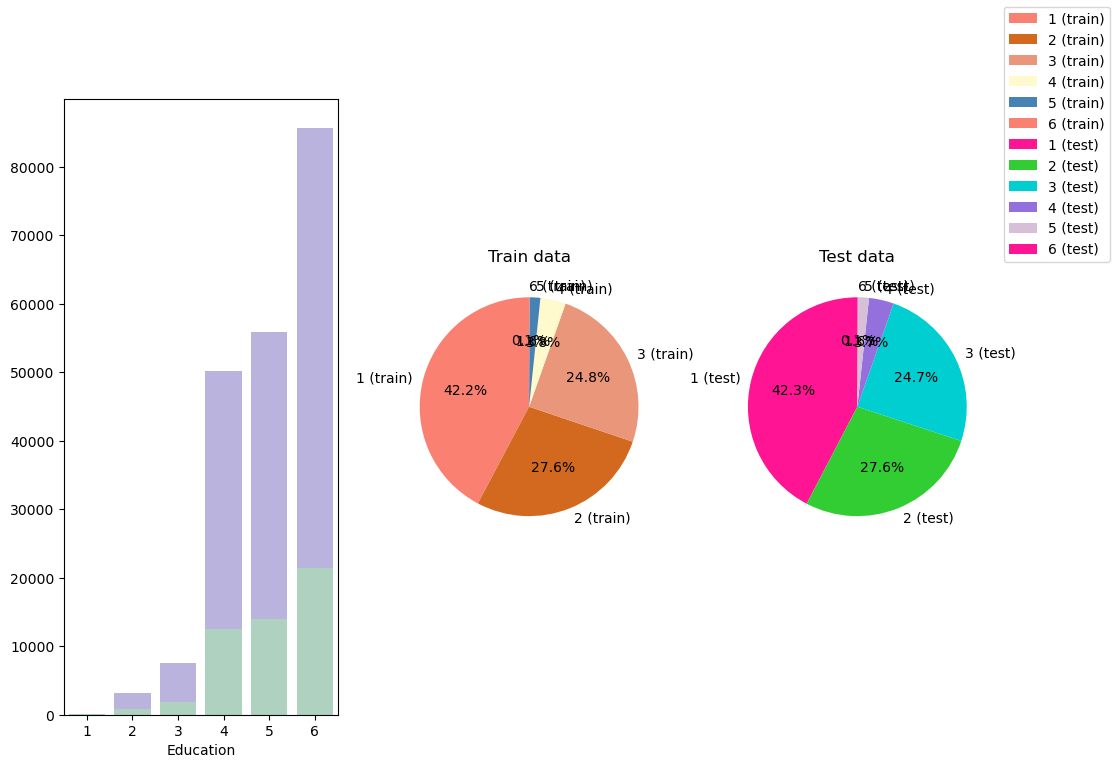

----Education----
Train data
           Counts  Percentage
Education                    
6           85653    0.422485
5           55896    0.275708
4           50223    0.247726
3            7613    0.037551
2            3212    0.015843
1             139    0.000686

Test data
           Counts  Percentage
Education                    
6           21483    0.423427
5           13999    0.275918
4           12523    0.246827
3            1865    0.036759
2             831    0.016379
1              35    0.000690

          data_model     data_test
count  202736.000000  50736.000000
mean        5.049384      5.051187
std         0.985668      0.986477
min         1.000000      1.000000
25%         4.000000      4.000000
50%         5.000000      5.000000
75%         6.000000      6.000000
max         6.000000      6.000000


In [32]:
uni_cat_plot(data_model, data_test, 'Education', [1,2,3,4,5,6])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Education')

#### 2.1.17. Income analysis

Categorical data:
- 1-4: less than $10.000
- 5-7: less than $35.000
- 8: more than $75.000

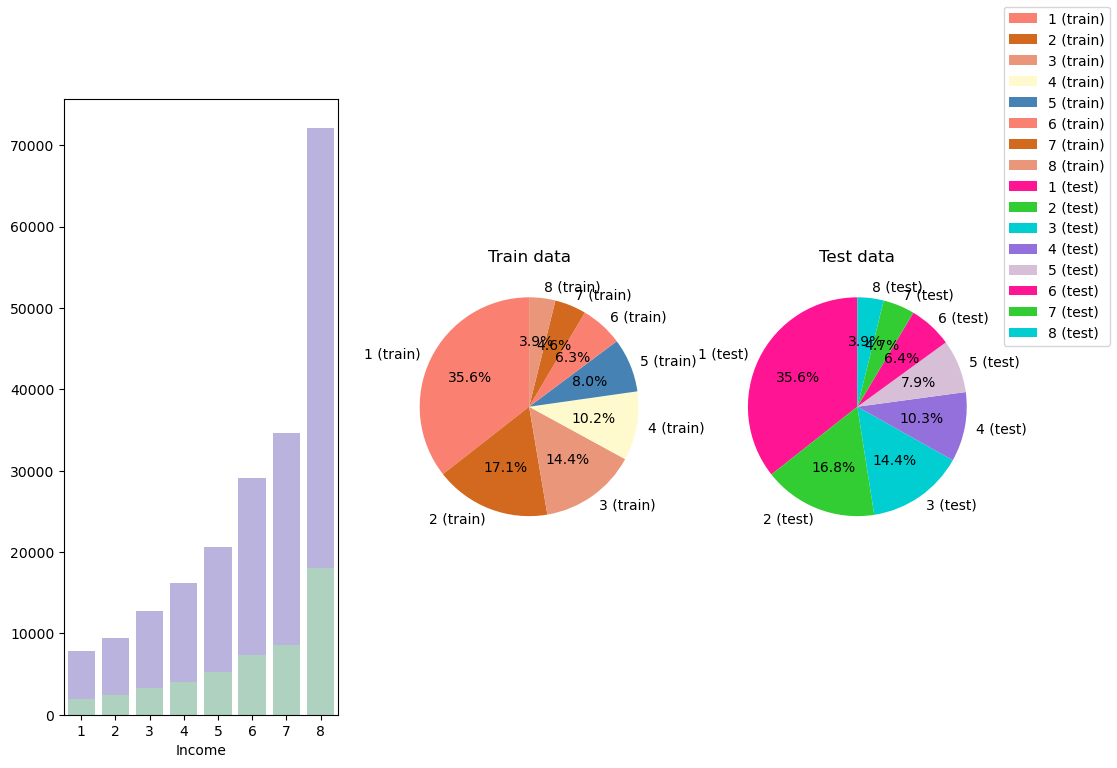

----Income----
Train data
        Counts  Percentage
Income                    
8        72119    0.355729
7        34666    0.170991
6        29155    0.143808
5        20669    0.101950
4        16149    0.079655
3        12725    0.062766
2         9410    0.046415
1         7843    0.038686

Test data
        Counts  Percentage
Income                    
8        18076    0.356276
7         8546    0.168441
6         7306    0.144000
5         5212    0.102728
4         3986    0.078564
3         3269    0.064432
2         2373    0.046772
1         1968    0.038789

          data_model     data_test
count  202736.000000  50736.000000
mean        6.053799      6.046811
std         2.070335      2.075180
min         1.000000      1.000000
25%         5.000000      5.000000
50%         7.000000      7.000000
75%         8.000000      8.000000
max         8.000000      8.000000


In [33]:
uni_cat_plot(data_model, data_test, 'Income', [1,2,3,4,5,6,7,8])
uni_stat_summary(data_model=data_model, data_test=data_test, column='Income')

#### 2.1.18. PhysActivity analysis

Categorical data:
- 0: perform no physical activities
- 1: perform physical activities

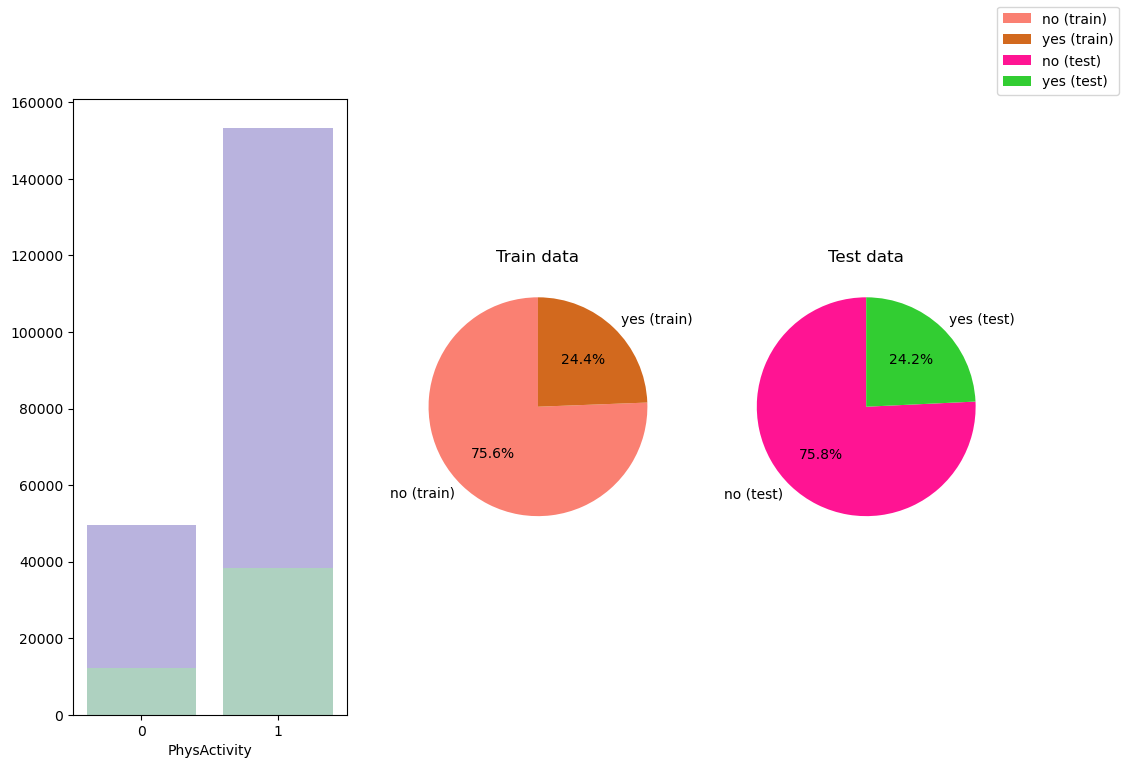

----PhysActivity----
Train data
              Counts  Percentage
PhysActivity                    
1             153281    0.756062
0              49455    0.243938

Test data
              Counts  Percentage
PhysActivity                    
1              38433    0.757509
0              12303    0.242491

          data_model     data_test
count  202736.000000  50736.000000
mean        0.756062      0.757509
std         0.429457      0.428594
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [34]:
uni_cat_plot(data_model, data_test, 'PhysActivity', ['no', 'yes'])
uni_stat_summary(data_model=data_model, data_test=data_test, column='PhysActivity')

#### 2.1.19. BMI analysis

Numerical data:
- Body mass index

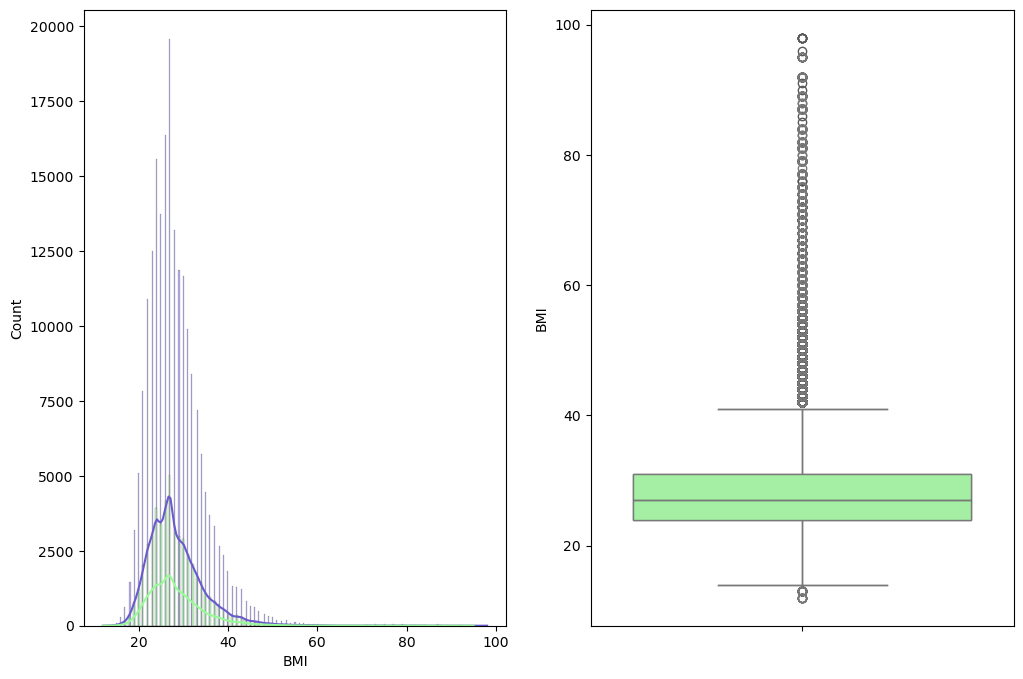

----BMI----
Train data
     Counts  Percentage
BMI                    
27    19574    0.096549
26    16373    0.080760
24    15585    0.076873
25    13742    0.067783
28    13192    0.065070
23    12519    0.061750
29    11884    0.058618
30    11679    0.057607
22    10898    0.053755
31     9887    0.048768
32     8408    0.041473
21     7819    0.038567
33     7190    0.035465
34     5732    0.028273
20     5086    0.025087
35     4469    0.022043
36     3678    0.018142
37     3325    0.016401
19     3179    0.015680
38     2658    0.013111
39     2345    0.011567
40     1823    0.008992
18     1458    0.007192
41     1325    0.006536
42     1278    0.006304
43     1217    0.006003
44      825    0.004069
45      664    0.003275
17      625    0.003083
46      618    0.003048
47      491    0.002422
48      384    0.001894
49      329    0.001623
16      286    0.001411
50      285    0.001406
51      203    0.001001
53      184    0.000908
52      173    0.000853
55      133    0.

In [35]:
uni_num_plot(data_model, data_test, 'BMI')
uni_stat_summary(data_model=data_model, data_test=data_test, column='BMI')

#### 2.1.20. MentHlth analysis

Numerical data:
- 0-30: having any problem with mental health in the past 3 days

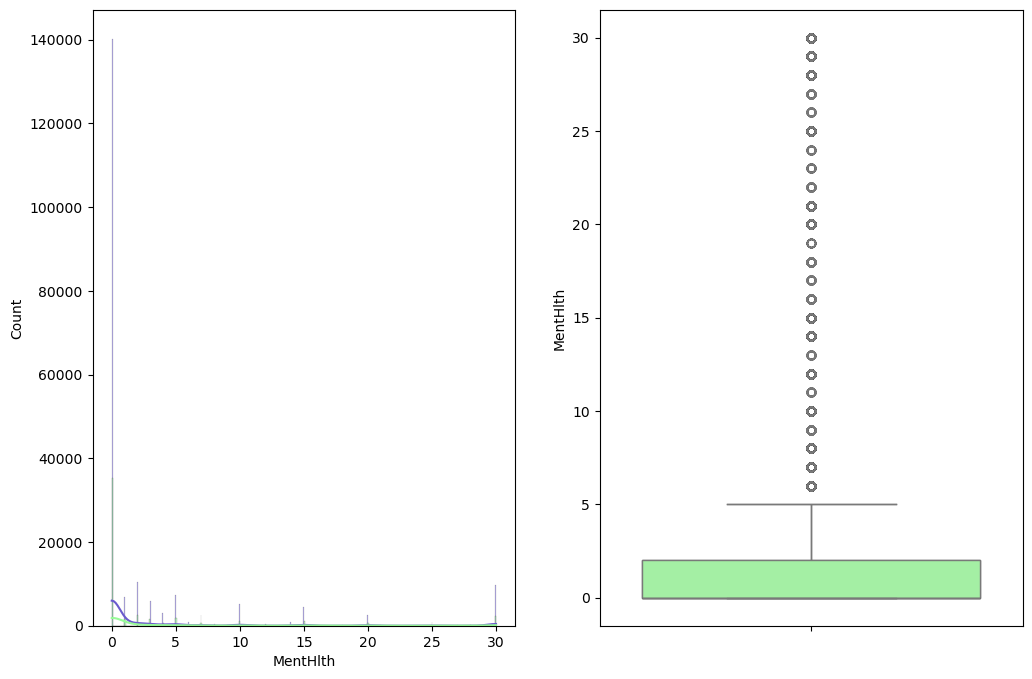

----MentHlth----
Train data
          Counts  Percentage
MentHlth                    
0         140140    0.691244
2          10450    0.051545
30          9738    0.048033
5           7269    0.035855
1           6863    0.033852
3           5882    0.029013
10          5128    0.025294
15          4426    0.021831
4           3076    0.015172
20          2651    0.013076
7           2472    0.012193
25           956    0.004715
14           947    0.004671
6            784    0.003867
8            519    0.002560
12           323    0.001593
28           259    0.001278
21           189    0.000932
29           128    0.000631
9             74    0.000365
18            73    0.000360
16            69    0.000340
27            64    0.000316
22            48    0.000237
17            38    0.000187
23            34    0.000168
13            32    0.000158
11            32    0.000158
26            32    0.000158
24            27    0.000133
19            13    0.000064

Test data
    

In [36]:
uni_num_plot(data_model, data_test, 'MentHlth')
uni_stat_summary(data_model=data_model, data_test=data_test, column='MentHlth')

#### 2.1.21. PhysHlth analysis

Numerical data:
- 0-30: Having any physical health issues in the last 30 days

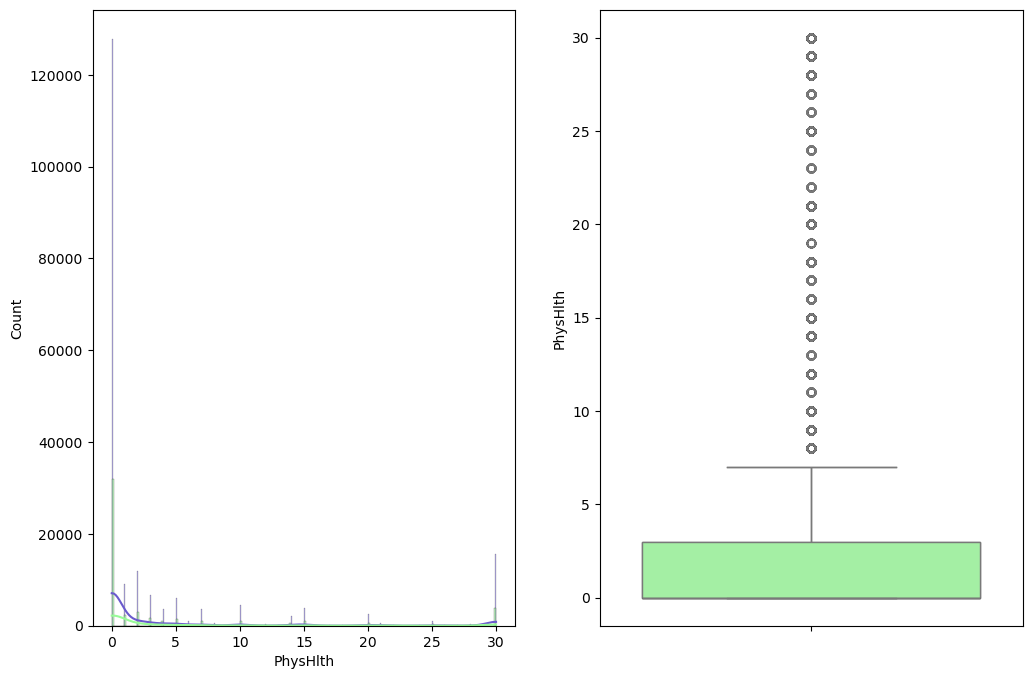

----PhysHlth----
Train data
          Counts  Percentage
PhysHlth                    
0         127785    0.630302
30         15631    0.077100
2          11845    0.058426
1           9095    0.044861
3           6776    0.033423
5           6065    0.029916
10          4495    0.022172
15          3928    0.019375
4           3595    0.017732
7           3584    0.017678
20          2627    0.012958
14          2060    0.010161
6           1082    0.005337
25          1059    0.005224
8            664    0.003275
21           528    0.002604
12           471    0.002323
28           420    0.002072
29           163    0.000804
9            150    0.000740
18           122    0.000602
16            94    0.000464
17            78    0.000385
27            76    0.000375
24            62    0.000306
26            56    0.000276
13            55    0.000271
11            54    0.000266
22            51    0.000252
23            46    0.000227
19            19    0.000094

Test data
    

In [37]:
uni_num_plot(data_model, data_test, 'PhysHlth')
uni_stat_summary(data_model=data_model, data_test=data_test, column='PhysHlth')

#### 2.1.22. ExtraMedTest analysis

Numerical data:
- (-100,100): The result of extra medical test, ranging from -100 to 100

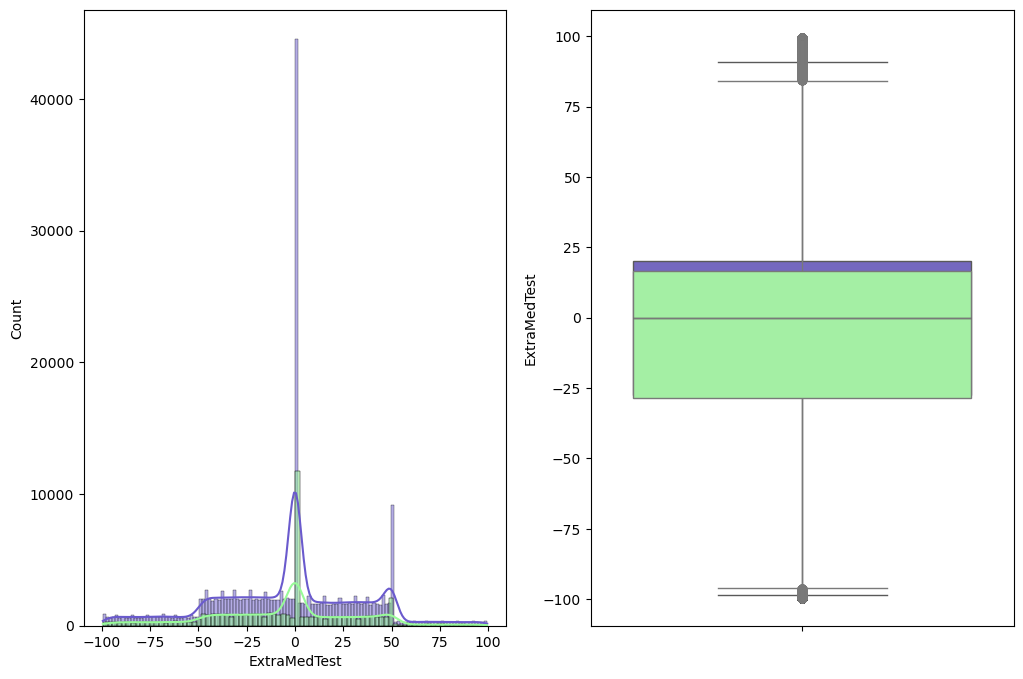

----ExtraMedTest----
Train data
              Counts  Percentage
ExtraMedTest                    
 0.0           42879    0.211502
 50.0           8984    0.044314
-17.0            729    0.003596
-47.5            728    0.003591
-14.0            726    0.003581
-3.5             717    0.003537
-22.5            714    0.003522
-29.0            710    0.003502
-36.5            704    0.003472
-32.0            703    0.003468
-45.5            702    0.003463
-20.0            701    0.003458
-31.0            701    0.003458
-22.0            695    0.003428
-46.0            693    0.003418
-46.5            692    0.003413
-19.0            691    0.003408
-4.0             691    0.003408
-7.5             690    0.003403
-16.5            690    0.003403
-2.5             689    0.003399
-25.5            688    0.003394
-25.0            688    0.003394
-37.5            687    0.003389
-35.0            686    0.003384
-47.0            685    0.003379
-24.0            684    0.003374
-5.0       

In [38]:
uni_num_plot(data_model, data_test, 'ExtraMedTest')
uni_stat_summary(data_model=data_model, data_test=data_test, column='ExtraMedTest')

#### 2.1.23. ExtraAlcoholTest analysis

Numerical data:
- (-100,100): The result of extra alcohol test, ranging from -100 to 100

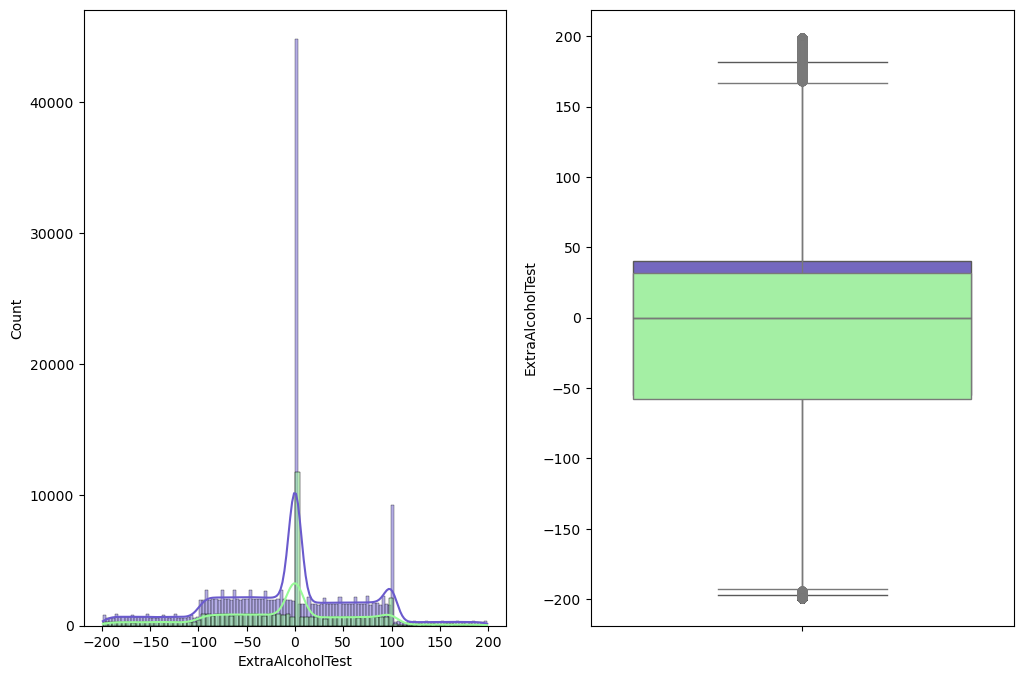

----ExtraAlcoholTest----
Train data
                  Counts  Percentage
ExtraAlcoholTest                    
 0                 43040    0.212296
 100                9051    0.044644
-33                  721    0.003556
-81                  720    0.003551
-43                  720    0.003551
-30                  717    0.003537
-62                  715    0.003527
-53                  714    0.003522
-60                  713    0.003517
-73                  710    0.003502
-13                  708    0.003492
-1                   708    0.003492
-44                  704    0.003472
-85                  704    0.003472
-14                  702    0.003463
-10                  701    0.003458
-68                  699    0.003448
-35                  699    0.003448
-69                  698    0.003443
-77                  697    0.003438
-51                  697    0.003438
-12                  695    0.003428
-21                  695    0.003428
-48                  695    0.003428
-4

In [39]:
uni_num_plot(data_model, data_test, 'ExtraAlcoholTest')
uni_stat_summary(data_model=data_model, data_test=data_test, column='ExtraAlcoholTest')

#### 2.1.24. Status analysis

Categorical data. Also the target for this dataset:
- 0: No diabetes
- 1: Diabetes

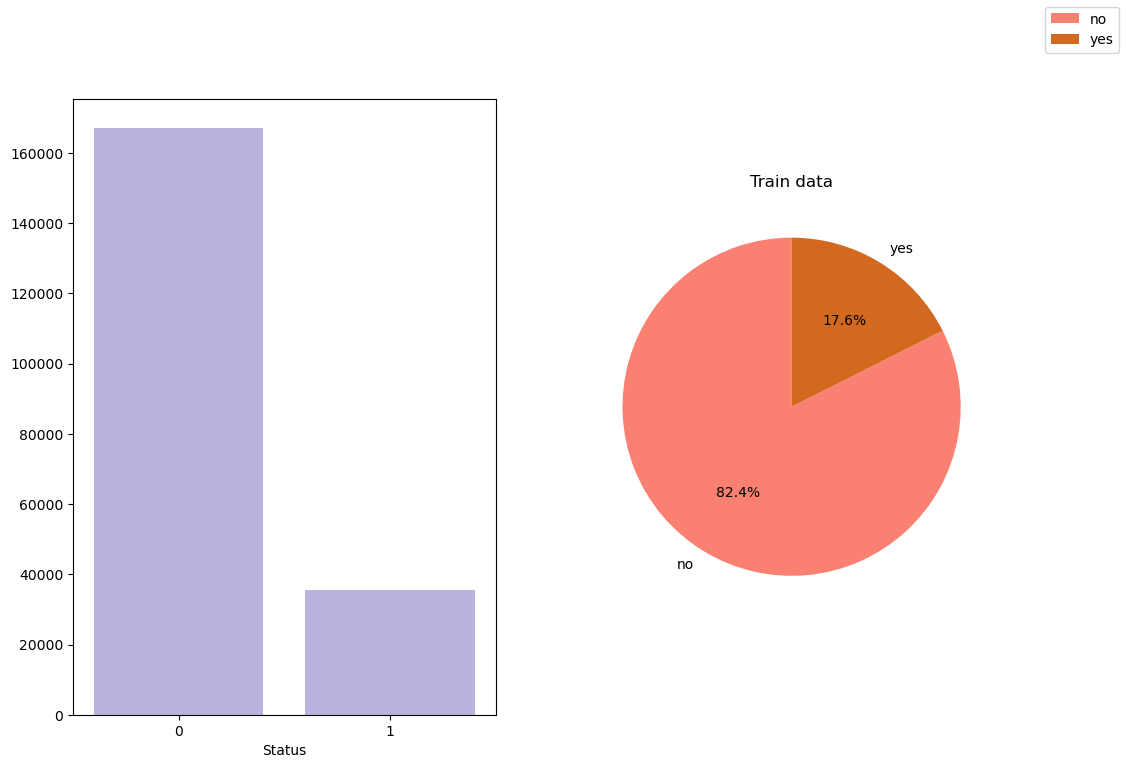

----Status----
Train data
        Counts  Percentage
Status                    
0       167105    0.824249
1        35631    0.175751

Test data
Empty DataFrame
Columns: [Counts, Percentage]
Index: []

          data_model  data_test
count  202736.000000        0.0
mean        0.175751        NaN
std         0.380609        NaN
min         0.000000        NaN
25%         0.000000        NaN
50%         0.000000        NaN
75%         0.000000        NaN
max         1.000000        NaN


In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=False, sharey=False)

axes[1].pie(data_model['Status'].value_counts(), autopct='%1.1f%%', startangle=90, colors=['salmon', 'chocolate', 'darksalmon', 'lemonchiffon', 'steelblue'], shadow=False, labels=['no', 'yes'])
axes[1].set_title('Train data')

sns.barplot(x=data_model['Status'].value_counts().index, y=data_model['Status'].value_counts().values, color='slateblue', alpha=0.5, ax=axes[0])
    
fig.legend()
plt.show()    
uni_stat_summary(data_model=data_model, data_test=data_test, column='Status')

### 2.2. Data observation

## 3. Multivariate data analysis

In this section, we will look through the correlation of each of the feature with the target, which can be useful to pick out the appropriate features for training dataset

#### 3.1. Correlation among all features

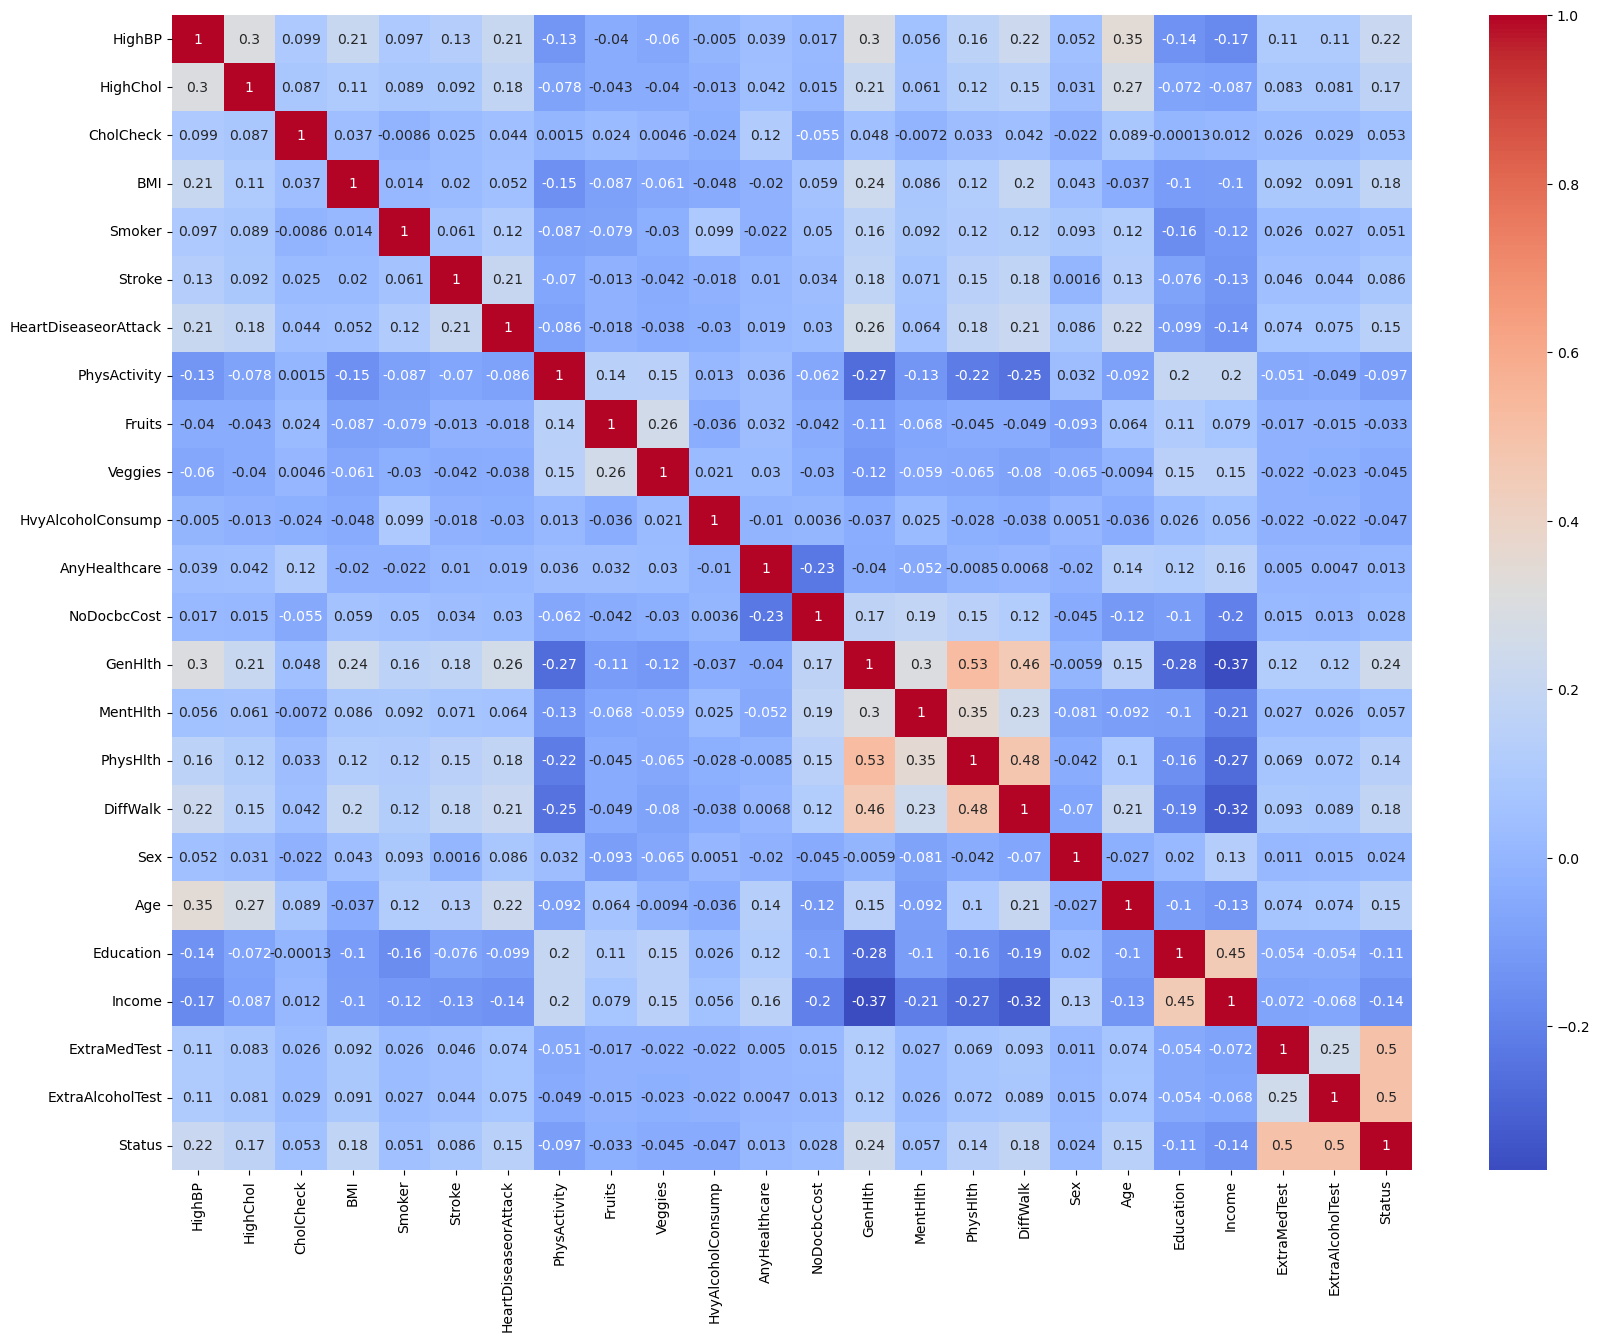

In [41]:
data_model_corr = data_model.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(data_model_corr, annot=True, cmap='coolwarm')
plt.show()

Conclusion:
- Most of the features has low correlation between each other.
- Some regions of correlation are considerable, such as GenHlth * DiffWalk, Education - Income
- Target feature - Status - has high correlation with ExtraMedTest and ExtraAlcoholTest


#### 3.2. HighBP, HighChol, CholCheck, Stroke and HeartDiseaseorAttack analysis

##### HighBP effect on Status

In [42]:
pd.crosstab(data_model['Status'], data_model['HighBP'], normalize='index')


HighBP,0,1
Status,,
0,0.620382,0.379618
1,0.339059,0.660941


Text(0.5, 1.0, 'Status vs HighChol')

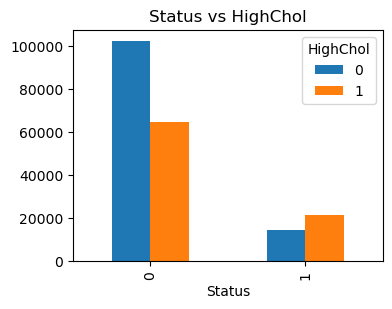

In [43]:
pd.crosstab(data_model['Status'], data_model['HighChol']).plot(kind='bar', figsize=(4, 3))
plt.title('Status vs HighChol')

In [44]:
cal_percent(data_model, data_test, 'Status', 'HighBP')

Status  HighBP
0       0         62.038239
        1         37.961761
1       1         66.094132
        0         33.905868
dtype: float64


<Bold>The above observation points out the positive correlation of HighBP and status, with the proportion of 1-1 and 0-0 higher than 60%

##### HighChol correlation with Status

In [45]:
pd.crosstab(data_model['Status'], data_model['HighChol'], normalize='index')

HighChol,0,1
Status,,
0,0.613273,0.386727
1,0.397603,0.602397


<Axes: xlabel='Status'>

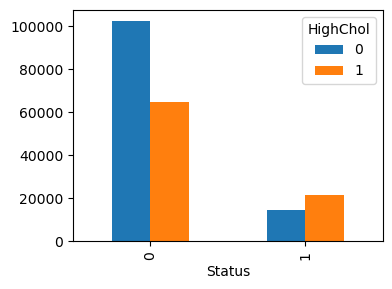

In [46]:
pd.crosstab(data_model['Status'], data_model['HighChol']).plot(kind='bar', figsize=(4, 3))

In [55]:
cal_percent(data_model, data_test, 'Status', 'HighChol')

Status  HighChol
0       0           61.327309
        1           38.672691
1       1           60.239679
        0           39.760321
dtype: float64


##### CholCheck correlation with Status

In [47]:
pd.crosstab(data_model['Status'], data_model['CholCheck'], normalize='index')

CholCheck,0,1
Status,,
0,0.042015,0.957985
1,0.015632,0.984368


<Axes: xlabel='Status'>

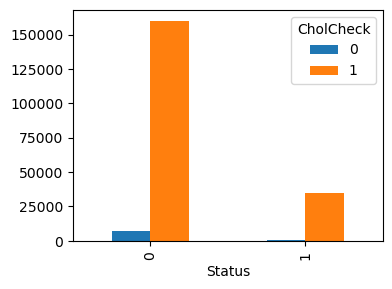

In [48]:
pd.crosstab(data_model['Status'], data_model['CholCheck']).plot(kind='bar', figsize=(4, 3))

In [56]:
cal_percent(data_model, data_test, 'Status', 'CholCheck')

Status  CholCheck
0       1            95.798450
        0             4.201550
1       1            98.436755
        0             1.563245
dtype: float64


##### Stroke correlation with Status

In [49]:
pd.crosstab(data_model['Status'], data_model['Stroke'], normalize='index')

Stroke,0,1
Status,,
0,0.967009,0.032991
1,0.922090,0.077910


<Axes: xlabel='Status'>

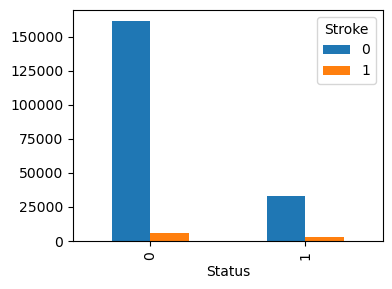

In [50]:
pd.crosstab(data_model['Status'], data_model['Stroke']).plot(kind='bar', figsize=(4, 3))

In [57]:
cal_percent(data_model, data_test, 'Status', 'Stroke')

Status  Stroke
0       0         96.700877
        1          3.299123
1       0         92.209031
        1          7.790969
dtype: float64


##### HeartDiseaseorAttack correlation with Status

In [51]:
pd.crosstab(data_model['Status'], data_model['HeartDiseaseorAttack'], normalize='index')

HeartDiseaseorAttack,0,1
Status,,
0,0.925197,0.074803
1,0.813196,0.186804


<Axes: xlabel='Status'>

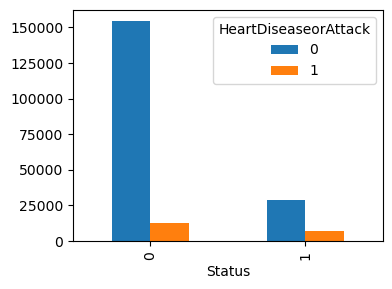

In [52]:
pd.crosstab(data_model['Status'], data_model['HeartDiseaseorAttack']).plot(kind='bar', figsize=(4, 3))

In [58]:
cal_percent(data_model, data_test, 'Status', 'HeartDiseaseorAttack')

Status  HeartDiseaseorAttack
0       0                       92.519673
        1                        7.480327
1       0                       81.319637
        1                       18.680363
dtype: float64


##### Conclusion:
- HighBP, HighChol play vital role in detecting diabetes. They have positive correlation with Status of the patients.
- CholCheck and Stroke don't really impact the result of diabetes Status.
- HeartDiseaseorAttack can't verify that patients don't have diabetes. However, it might impact the patients Status if they HAVE cardio problem

#### 3.3. Smoker effect on Status

In [53]:
pd.crosstab(data_model['Status'], data_model['Smoker'], normalize='index')

Smoker,0,1
Status,,
0,0.568828,0.431172
1,0.501698,0.498302


<Axes: xlabel='Status'>

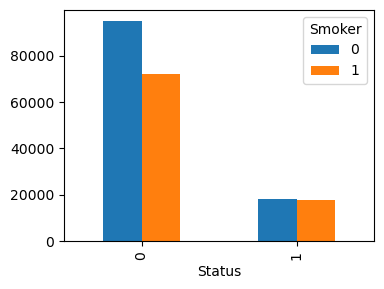

In [54]:
pd.crosstab(data_model['Status'], data_model['Smoker']).plot(kind='bar', figsize=(4, 3))

In [60]:
cal_percent(data_model, data_test, 'Status', 'Smoker')

Status  Smoker
0       0         56.882798
        1         43.117202
1       0         50.169796
        1         49.830204
dtype: float64


Conclusion:
- Smoker doesn't actually tell whether the patients have diabetes or not.

#### 3.4. Fruits and Veggies analysis

##### Fruit effect on Status

In [61]:
pd.crosstab(data_model['Status'], data_model['Fruits'], normalize='index')

Fruits,0,1
Status,,
0,0.357685,0.642315
1,0.398866,0.601134


<Axes: xlabel='Status'>

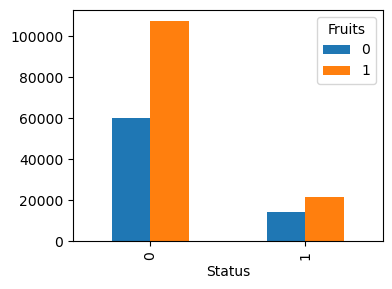

In [62]:
pd.crosstab(data_model['Status'], data_model['Fruits']).plot(kind='bar', figsize=(4, 3))

In [63]:
cal_percent(data_model, data_test, 'Status', 'Fruits')

Status  Fruits
0       1         64.231471
        0         35.768529
1       1         60.113384
        0         39.886616
dtype: float64


##### Veggies effecr on Status

In [64]:
pd.crosstab(data_model['Status'], data_model['Veggies'], normalize='index')

Veggies,0,1
Status,,
0,0.180503,0.819497
1,0.226909,0.773091


<Axes: xlabel='Status'>

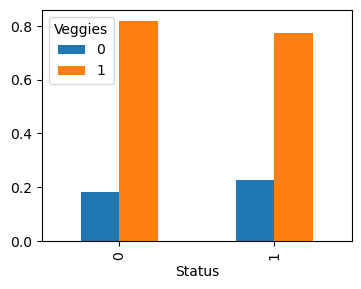

In [65]:
pd.crosstab(data_model['Status'], data_model['Veggies'], normalize='index').plot(kind='bar', figsize=(4, 3))

In [66]:
cal_percent(data_model, data_test, 'Status', 'Veggies')

Status  Veggies
0       1          81.949672
        0          18.050328
1       1          77.309085
        0          22.690915
dtype: float64
